# Notebook for making figures

- Other figures are presented in their respective notebooks
- This mainly focuses on figures regarding homology and modeling mutations in mouse.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica Neue']})
#rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=False)

In [2]:
path = '/Volumes/Sam_G_SSD/'
df = pd.read_csv(path+'flanksize_0.csv')

In [3]:
snps = df[df['variant_type']=='SNP']

In [4]:
mut_types = np.unique(df['variant_type'])

tot_length = []
coding = []
non_coding = []
homologous = []
non_homologous = []
excluded = []
for i in mut_types:
    snps = df[df['variant_type']==i]
    exc =  snps[snps['excluded_mutations']==1]
    coding1 = snps[snps['coding_mutations']==1]
    noncoding1 = snps[snps['non_coding_mutations']==1]
    homo = snps[snps['homologous']==1]
    no_homo = snps[snps['non_homologous']==1]
    #coding_exc = coding[coding['excluded_mutations']==0]
    
    excluded.append(exc)
    tot_length.append(len(snps))
    coding.append(len(coding1))
    non_coding.append(len(noncoding1))
    homologous.append(len(homo))
    non_homologous.append(len(no_homo))

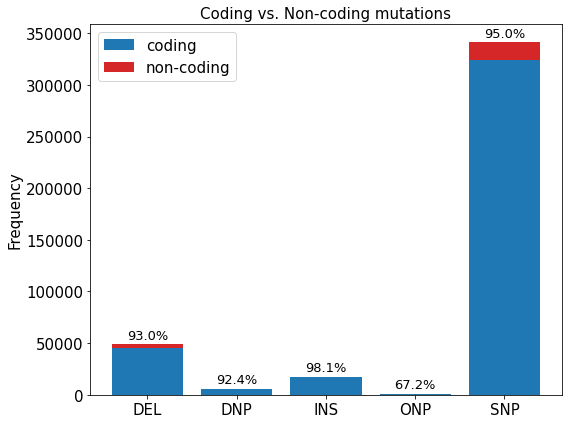

In [5]:
plt.figure(figsize=(8,6))
plt.bar(mut_types[0:5], coding[:5], label='coding')
plt.bar(mut_types[0:5], non_coding[:5], color='tab:red', bottom=coding[:5], label='non-coding')

plt.legend(fontsize=15)
plt.title('Coding vs. Non-coding mutations', fontsize=15)
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.ylabel('Frequency', fontsize=15)

for i in range(len(mut_types[0:5])):
    plt.text(i, coding[i] + non_coding[i]+5000, str(np.round(100*(coding[i]/(coding[i] + non_coding[i])), 1)) + '%', ha = 'center', fontsize=13)
    
plt.tight_layout() 
#plt.savefig('coding_muts.png', dpi=250)

In [6]:
np.asarray(homologous)+np.asarray(non_homologous)

array([ 45644,   5487,  17251,    671, 324306,      1,      1])

In [7]:
coding

[45644, 5487, 17251, 671, 324306, 1, 1]

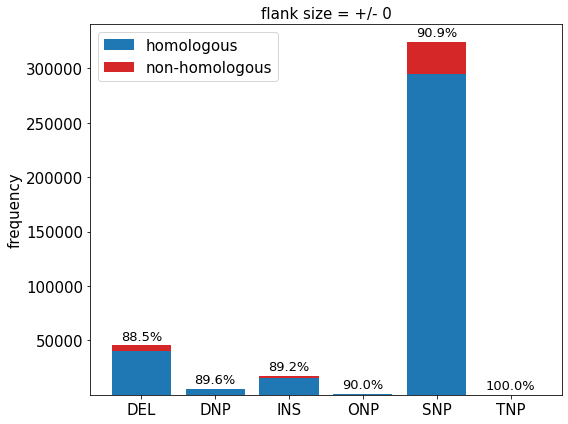

In [8]:
plt.figure(figsize=(8,6))
plt.bar(mut_types[0:6], homologous[:6], label='homologous')
plt.bar(mut_types[0:6], non_homologous[:6], color='tab:red', bottom=homologous[:6], label='non-homologous')
plt.legend(fontsize=15)
plt.title('flank size = +/- 0', fontsize=15)
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.ylabel('frequency', fontsize=15)
for i in range(len(mut_types[0:6])):
    plt.text(i, homologous[i] + non_homologous[i]+5000, str(np.round(100*(homologous[i]/(homologous[i] + non_homologous[i])), 1)) + '%', ha = 'center', fontsize=13)
    
plt.tight_layout()  

Loading in information about each of the flank sizes...

In [7]:
path = '/Volumes/Sam_G_SSD/'

tot_length1=[]
codingmut1=[]
non_coding1=[]
homologous1=[]
non_homologous1=[]
excluded1=[]

for i in range(21):
    df = pd.read_csv(path+'flanksize_' + str(i) +'.csv')

    mut_types = np.unique(df['variant_type'])

    tot_length = []
    coding = []
    non_coding = []
    homologous = []
    non_homologous = []
    excluded = []
    for i in mut_types:
        snps = df[df['variant_type']==i]
        exc =  snps[snps['excluded_mutations']==1]
        coding1 = snps[snps['coding_mutations']==1]
        noncoding1 = snps[snps['non_coding_mutations']==1]
        homo = snps[snps['homologous']==1]
        no_homo = snps[snps['non_homologous']==1]
        #coding_exc = coding[coding['excluded_mutations']==0]

        excluded.append(len(exc))
        tot_length.append(len(snps))
        coding.append(len(coding1))
        non_coding.append(len(noncoding1))
        homologous.append(len(homo))
        non_homologous.append(len(no_homo))
        
    tot_length1.append(tot_length)
    codingmut1.append(coding)
    non_coding1.append(non_coding)
    homologous1.append(homologous)
    non_homologous1.append(non_homologous)
    excluded1.append(excluded)

In [8]:
#plot of all coding mutations homology
coding_muts_total = sum(codingmut1[0])

coding_muts_total + sum(excluded1[0])+sum(non_coding1[0])
sum(tot_length)

422822

In [9]:
sum(tot_length)

422822

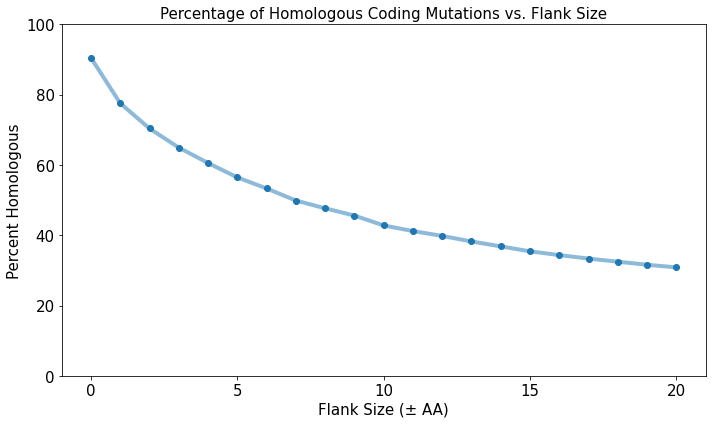

In [10]:
homologous_sum = np.sum(np.asarray(homologous1), axis=1)
plt.figure(figsize=(10,6))
plt.plot(range(21), 100*(homologous_sum/coding_muts_total), linewidth=4, alpha=0.5)
plt.scatter(range(21), 100*(homologous_sum/coding_muts_total))
plt.xlabel('Flank Size (\u00B1 AA)', fontsize=15)
plt.ylabel('Percent Homologous', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks([0,5,10,15,20],fontsize=15)
plt.ylim(0,100)
plt.title('Percentage of Homologous Coding Mutations vs. Flank Size', fontsize=15)
plt.tight_layout()
#plt.savefig('homologous_sum.png', dpi=250)

In [67]:
np.asarray(homologous1)[:,0]

array([40378, 32932, 29198, 26502, 24493, 22326, 20807, 19410, 18491,
       17658, 16960, 16258, 15583, 15033, 14436, 13730, 13365, 12964,
       12605, 12262, 12012])

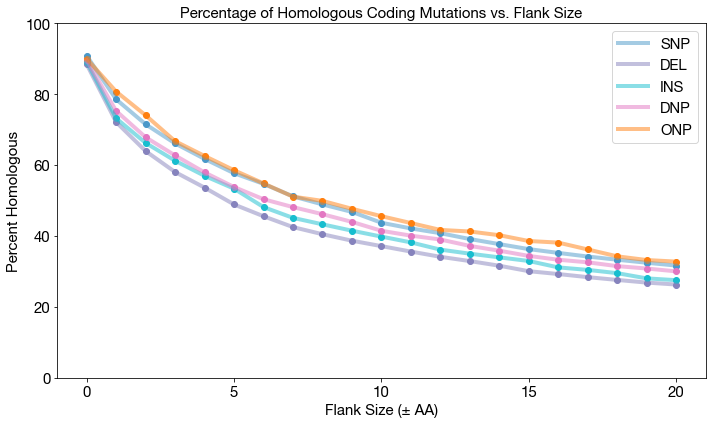

In [33]:
homologous_sum = np.sum(np.asarray(homologous1), axis=1)
plt.figure(figsize=(10,6))
#reordering the list to match other figure colorings

list_idx = [3, 4, 1, 2, 0]

list_idx = [4, 0, 2, 1, 3]

c_list = [plt.cm.Blues(0.6), 'tab:orange',plt.cm.Purples(0.6),'tab:pink', 'tab:cyan']
c_list = [plt.cm.Purples(0.6),'tab:pink','tab:cyan','tab:orange', plt.cm.Blues(0.6)]


for i in list_idx:
    plt.plot(range(21), 100*(np.asarray(homologous1)[:,i]/codingmut1[0][i]), color=c_list[i], linewidth=4, alpha=0.5, label=mut_types[i])
    plt.scatter(range(21), 100*(np.asarray(homologous1)[:,i]/codingmut1[0][i]), color=c_list[i])


plt.xlabel('Flank Size (\u00B1 AA)', fontsize=15)
plt.ylabel('Percent Homologous', fontsize=15)
plt.legend(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks([0,5,10,15,20],fontsize=15)
plt.ylim(0,100)
plt.title('Percentage of Homologous Coding Mutations vs. Flank Size', fontsize=15)
plt.tight_layout()
plt.savefig('homologous_sep_corect.png', dpi=250)

In [21]:
mut_types[0:5]

array(['DEL', 'DNP', 'INS', 'ONP', 'SNP'], dtype=object)

In [22]:
#plot of all coding mutations homology
coding_muts_total = sum(codingmut1[0])

coding_muts_total + sum(excluded1[0])+sum(non_coding1[0])
sum(tot_length)

422822

In [23]:
snps = codingmut1[0][4]+non_coding1[0][4]
non_snps = sum(tot_length)-snps-sum(excluded1[0])
excl = sum(excluded1[0])
snps+non_snps+excl

422822

In [24]:
snps_perc = np.round(100*(snps/(snps+non_snps+excl)),1)
non_snps_perc = np.round(100*(non_snps/(snps+non_snps+excl)),1)
excl_perc = np.round(100*(excl/(snps+non_snps+excl)),1)

In [25]:
snps_coding = codingmut1[0][4]
snpprct = np.round(100*(codingmut1[0][4]/(codingmut1[0][4]+non_coding1[0][4])), 1)
snp_noncoding = non_coding1[0][4]
non_snps_coding = sum(codingmut1[0])-codingmut1[0][4]
non_snps_noncoding = sum(non_coding1[0])-non_coding1[0][4]
nsnpprct = np.round(100*(non_snps_coding/(non_snps_coding+non_snps_noncoding)), 1)


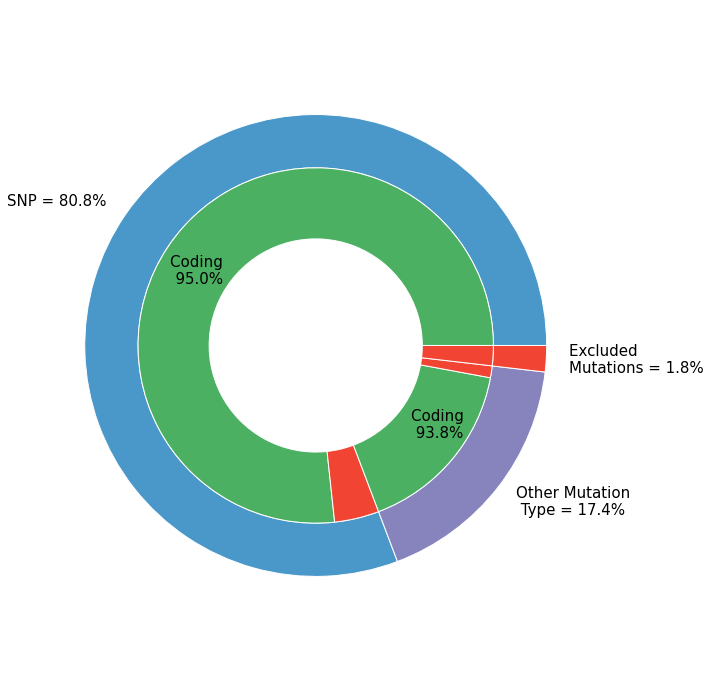

In [26]:
# Make data: I have 3 groups and 7 subgroups
group_names=['SNP = ' + str(snps_perc) + '%', 'Other Mutation \n Type = ' + str(non_snps_perc) + '%', 'Excluded \nMutations = '+ str(excl_perc) + '%'] #
snp_unrecorded = []
group_size=[snps, non_snps, excl] #excluding missing SNPs
subgroup_names=['\n    Coding\n  ' + str(snpprct) + '%', '', 'Coding \n ' + str(nsnpprct) + '%', '', '']

subgroup_size = [snps_coding,snp_noncoding, non_snps_coding,non_snps_noncoding, excl]
#subgroup_size=[4,3,5,6,5,10,5,5,4,6]
 
# Create colors
a, b, c, d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]
 
# First Ring (outside)
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), d(0.6),b(0.6)], textprops={'fontsize': 15})
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[c(0.6), b(0.6), c(0.6), b(0.6), b(0.6)], textprops={'fontsize': 15})
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.tight_layout()
plt.show()

#fig.savefig('coding_mut_donut.png', dpi=200)



In [27]:
flank_size=0
snps_homo = homologous1[flank_size][4]
snps_nonhomo = non_homologous1[flank_size][4]
non_snps_homo = sum(homologous1[flank_size]) - homologous1[flank_size][4]
non_snps_nonhomo =  sum(non_homologous1[flank_size]) - non_homologous1[flank_size][4]

snp_perc1 = np.round(100*(snps_homo/(snps_homo+snps_nonhomo)), 1)
non_snp_perc1 = np.round(100*(non_snps_homo/(non_snps_homo+non_snps_nonhomo)), 1)

In [28]:
[snps_homo, snps_nonhomo, non_snps_homo, non_snps_nonhomo]

[294688, 29618, 61281, 7774]

In [29]:
sum(np.asarray(codingmut1[0]))

393361

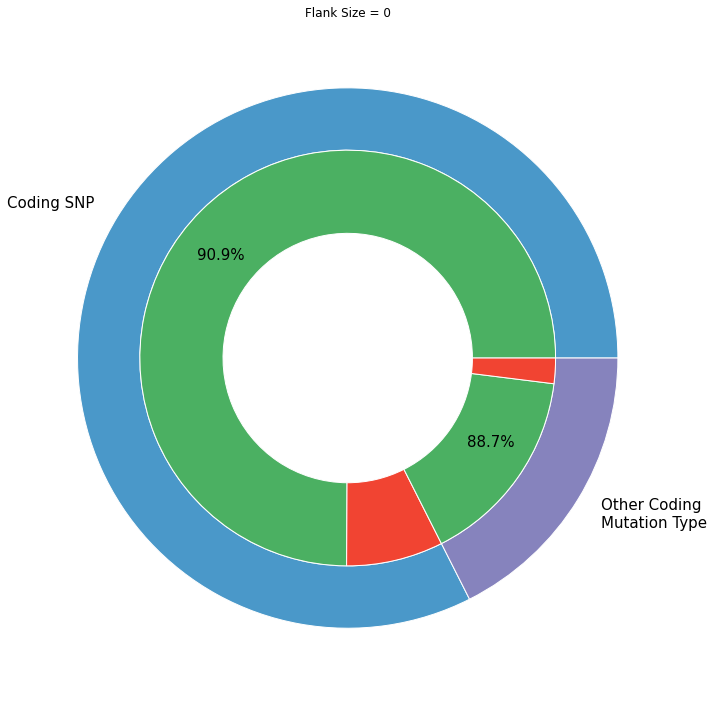

In [30]:
# Make data: I have 3 groups and 7 subgroups
group_names=['Coding SNP' , 'Other Coding\nMutation Type'] #
snp_unrecorded = []
group_size=[snps_homo + snps_nonhomo, non_snps_homo+non_snps_nonhomo] #excluding missing SNPs
subgroup_names=[str(snp_perc1) + '%', '', str(non_snp_perc1) + '%', '']

subgroup_size = [snps_homo, snps_nonhomo, non_snps_homo, non_snps_nonhomo]
#subgroup_size=[4,3,5,6,5,10,5,5,4,6]
 
# Create colors
a, b, c, d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]
 
# First Ring (outside)
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), d(0.6)], textprops={'fontsize': 15})
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[c(0.6), b(0.6), c(0.6), b(0.6)], textprops={'fontsize': 15})
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.title('Flank Size = ' + str(flank_size))
plt.tight_layout()
plt.show()
#plt.savefig('flank' + str(flank_size) + '_donut.png', dpi=250)

/Users/samgould/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


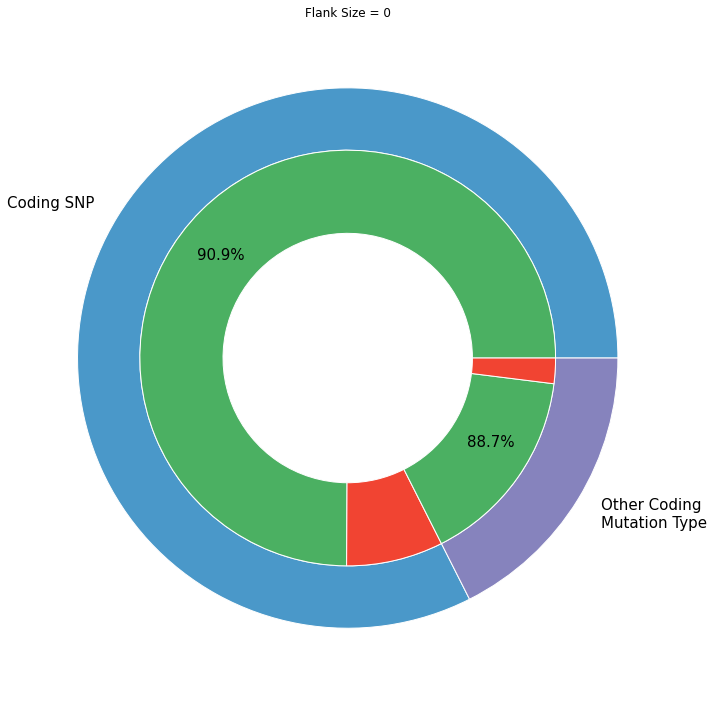

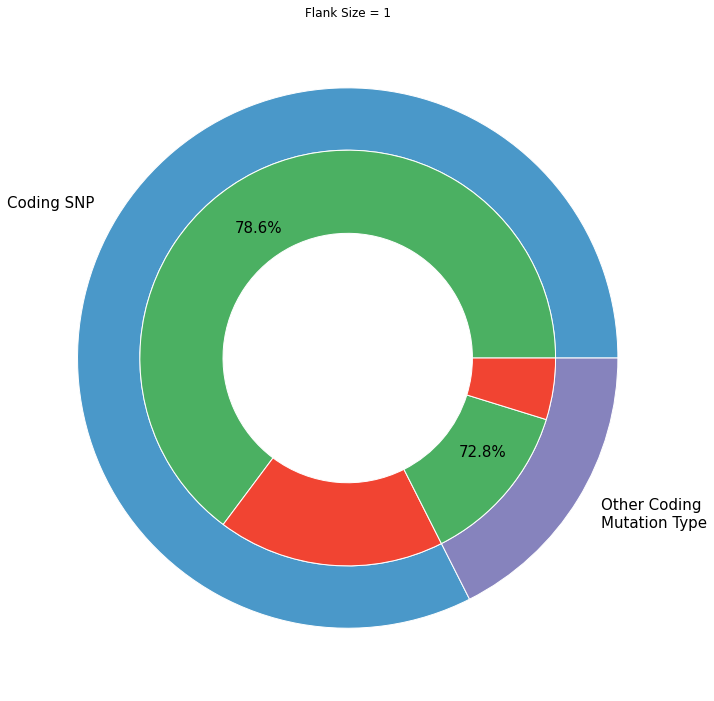

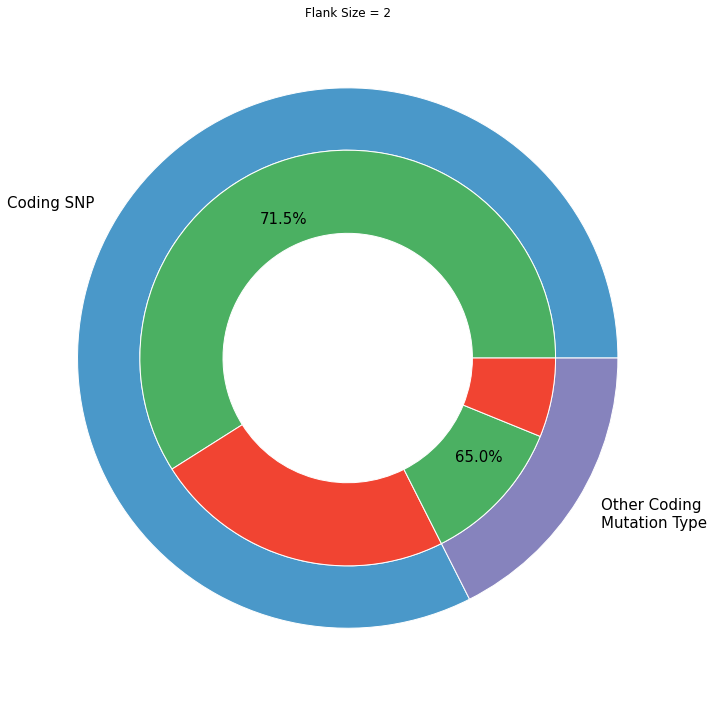

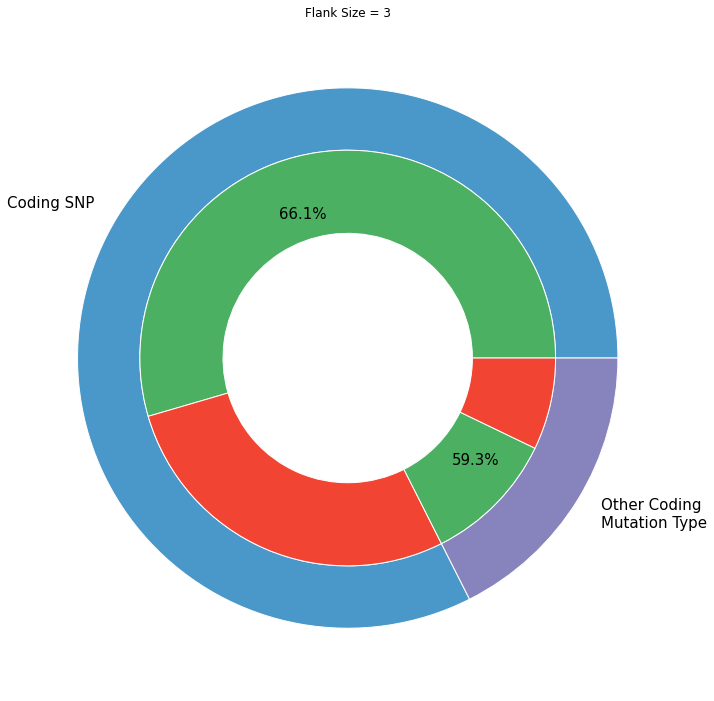

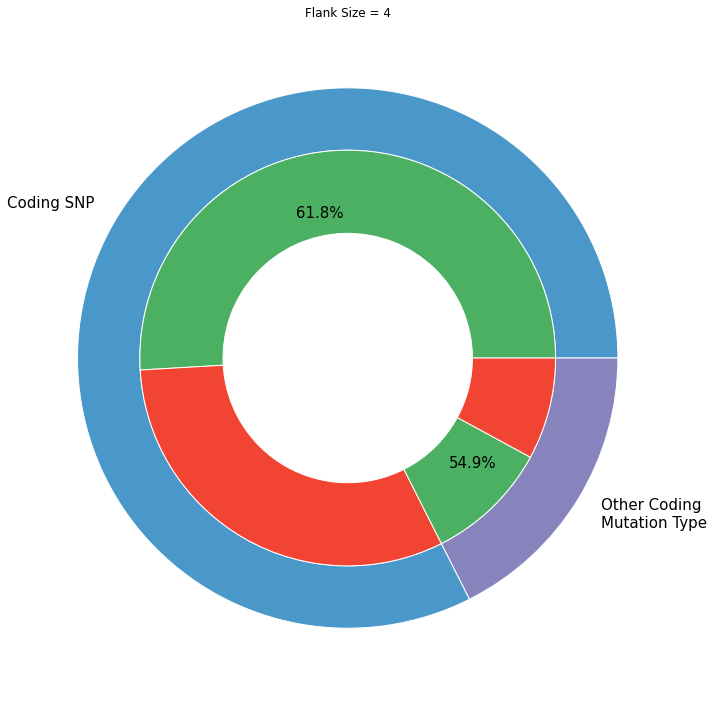

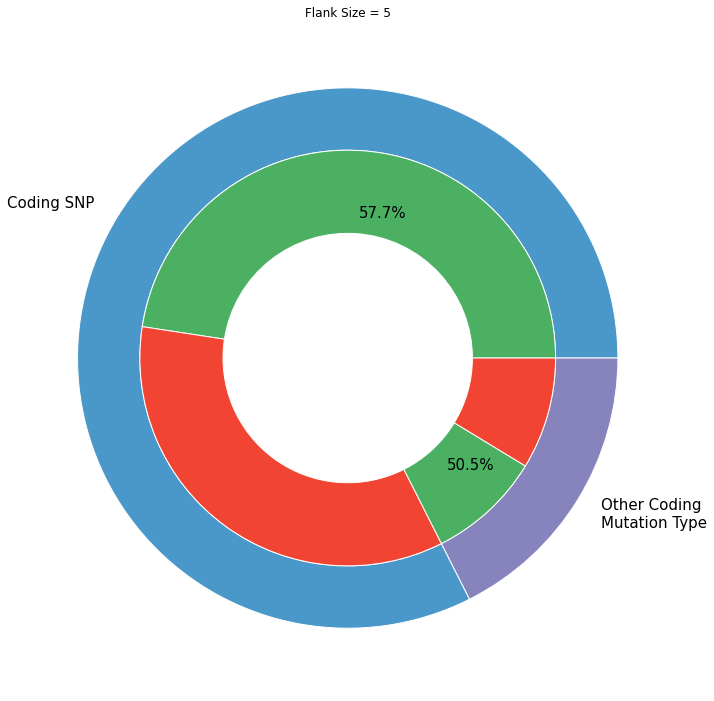

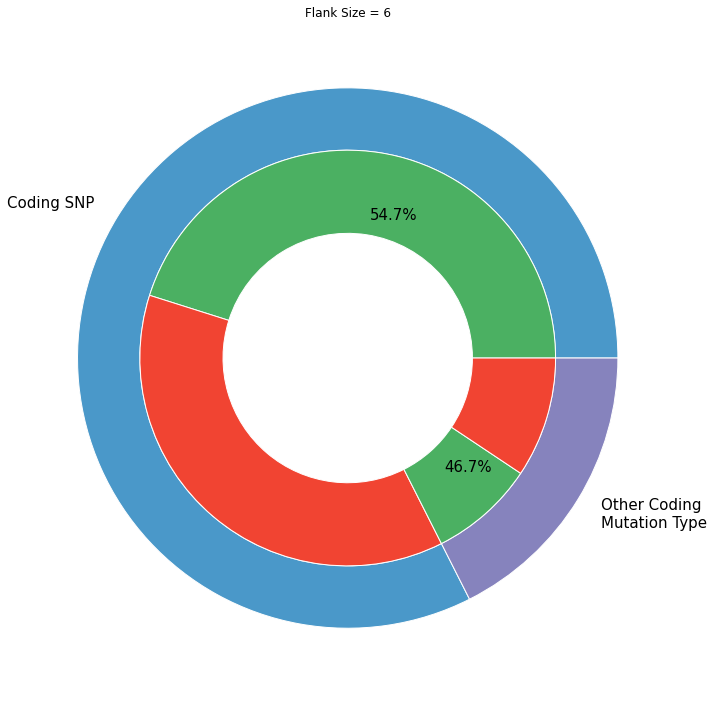

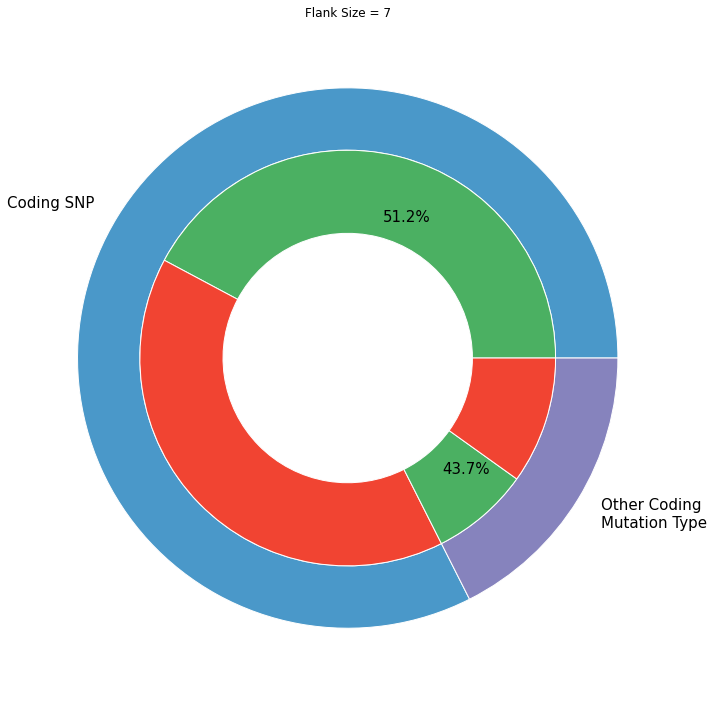

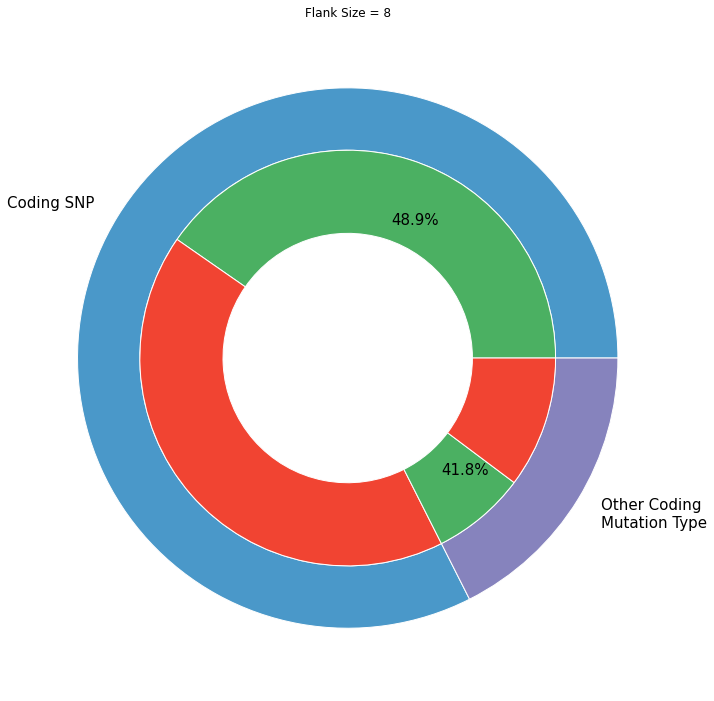

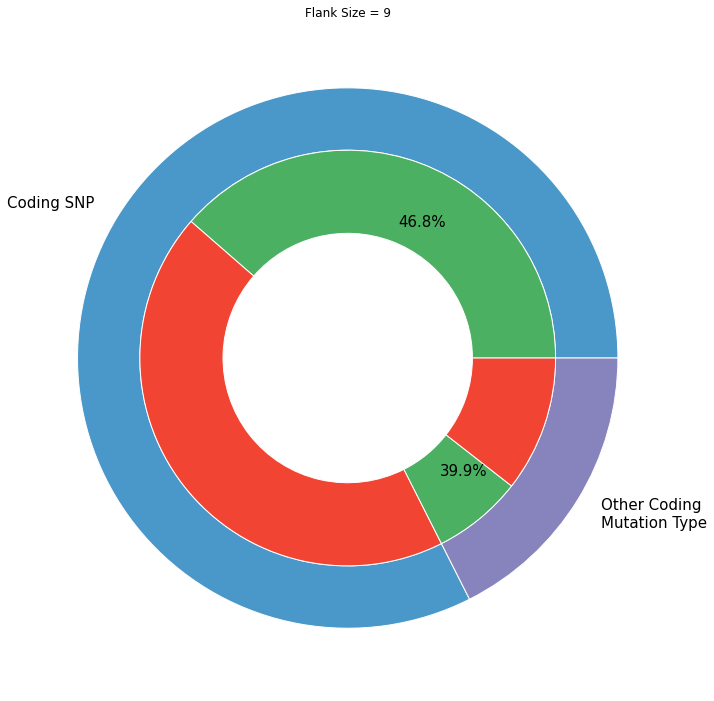

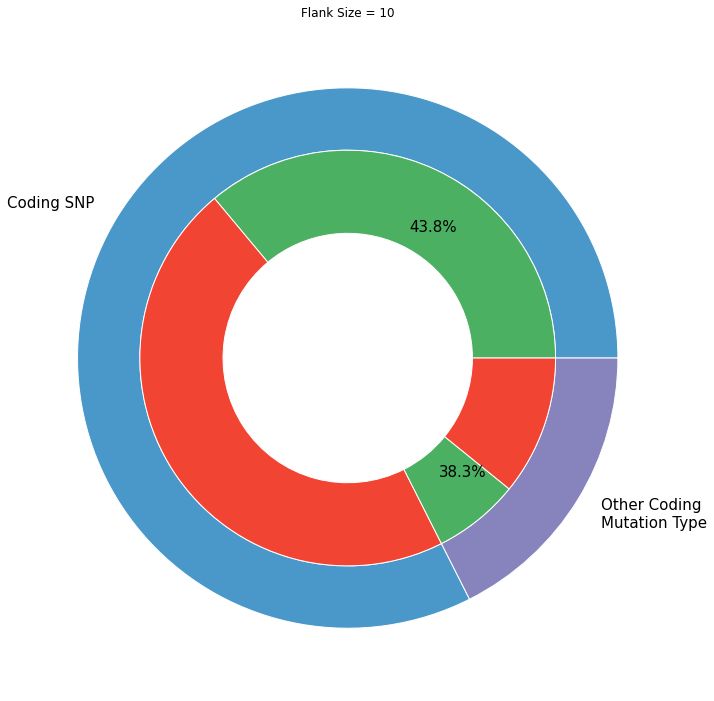

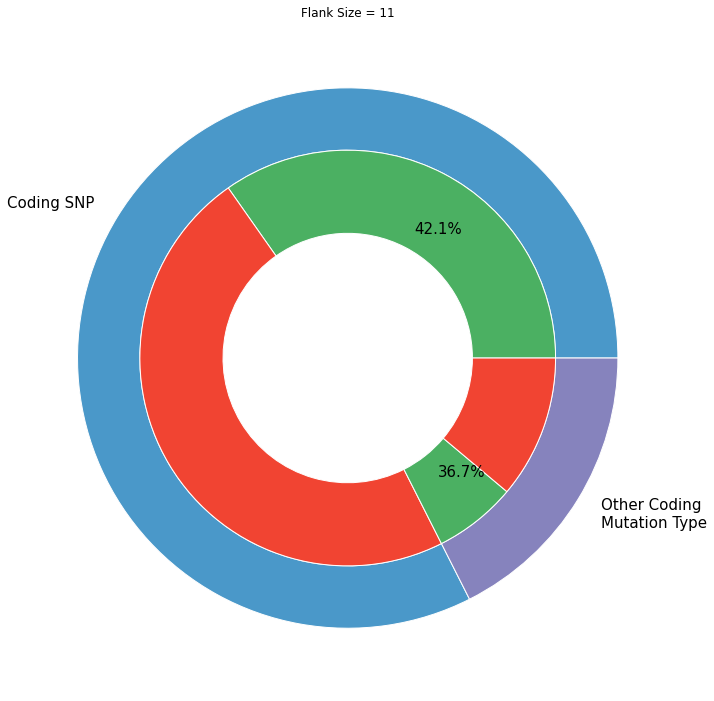

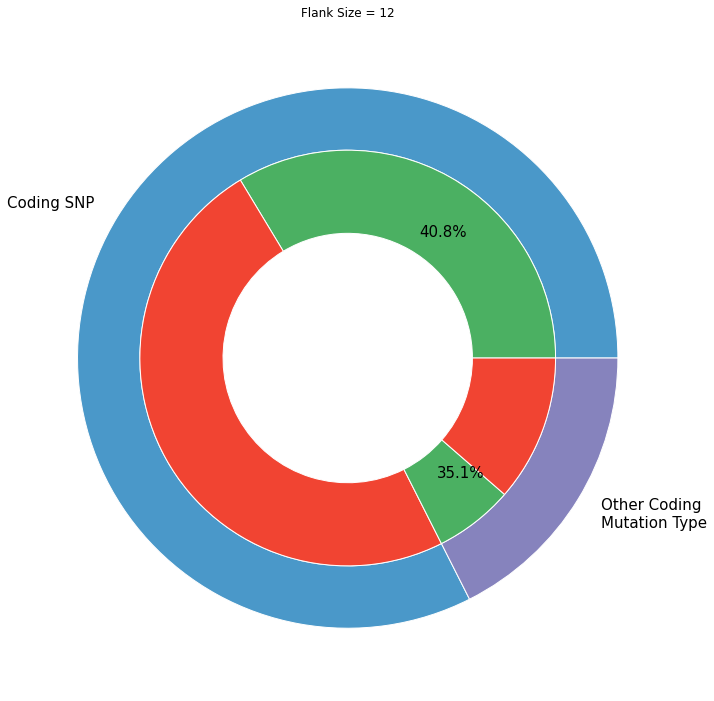

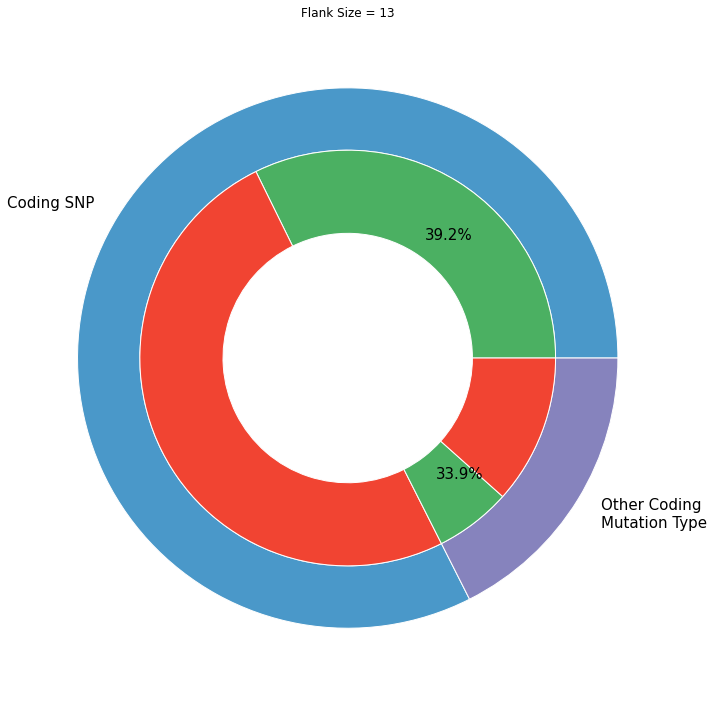

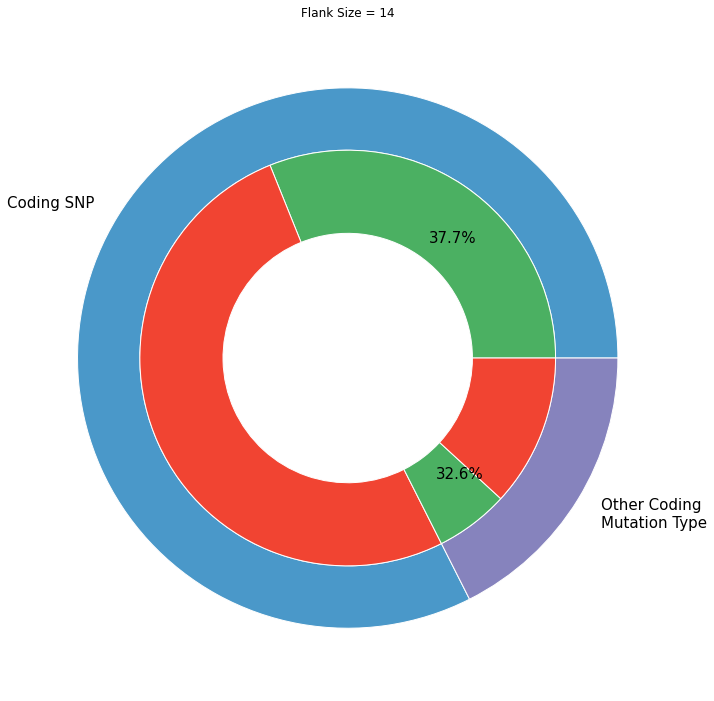

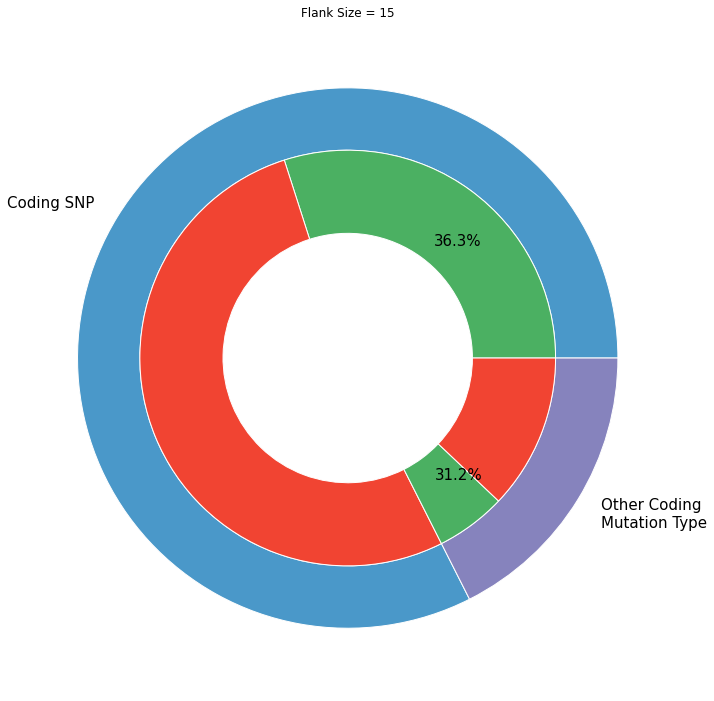

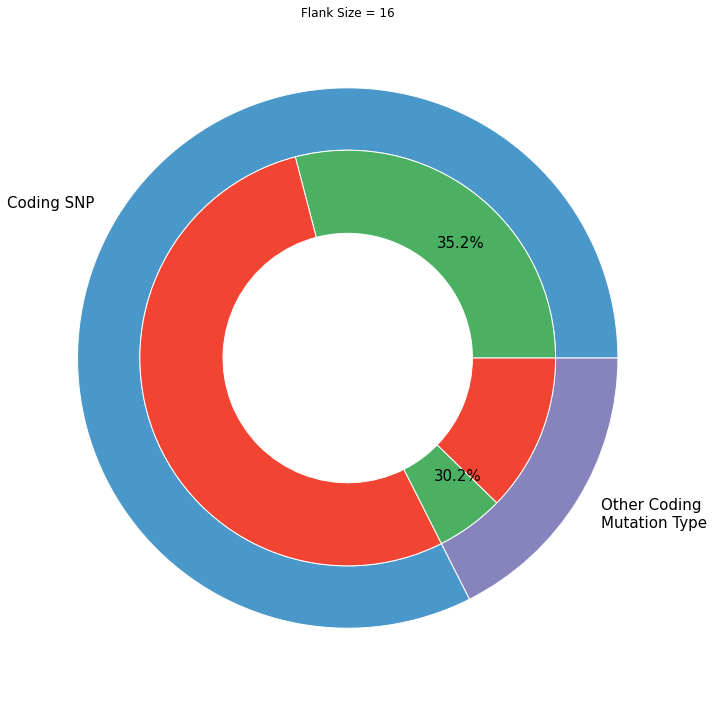

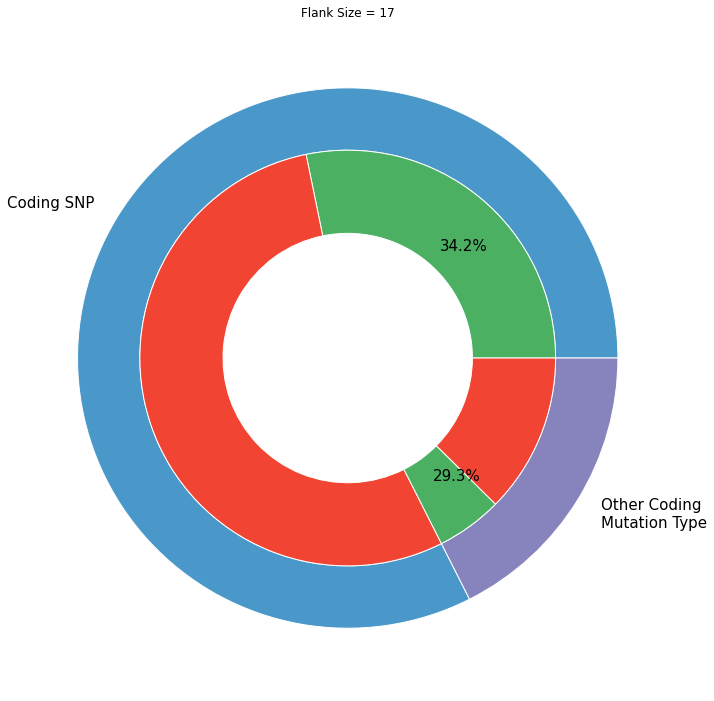

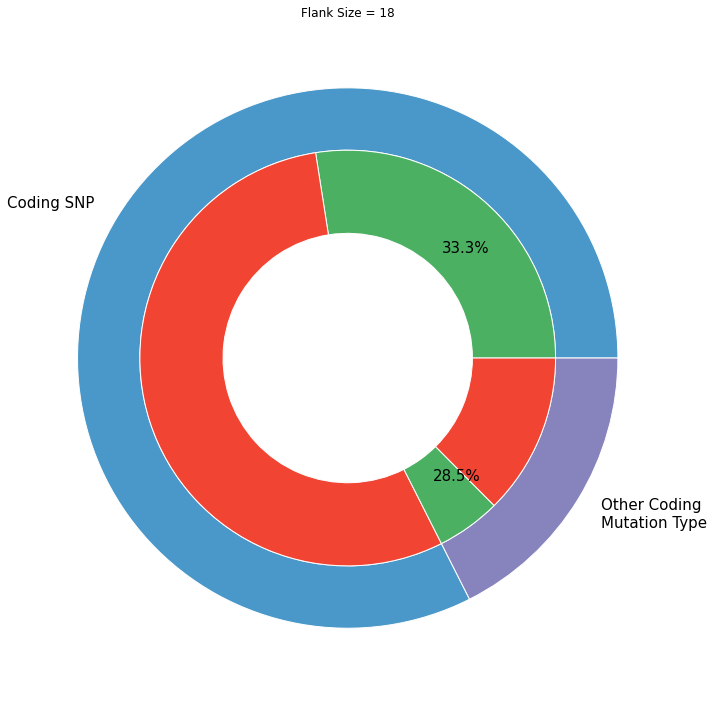

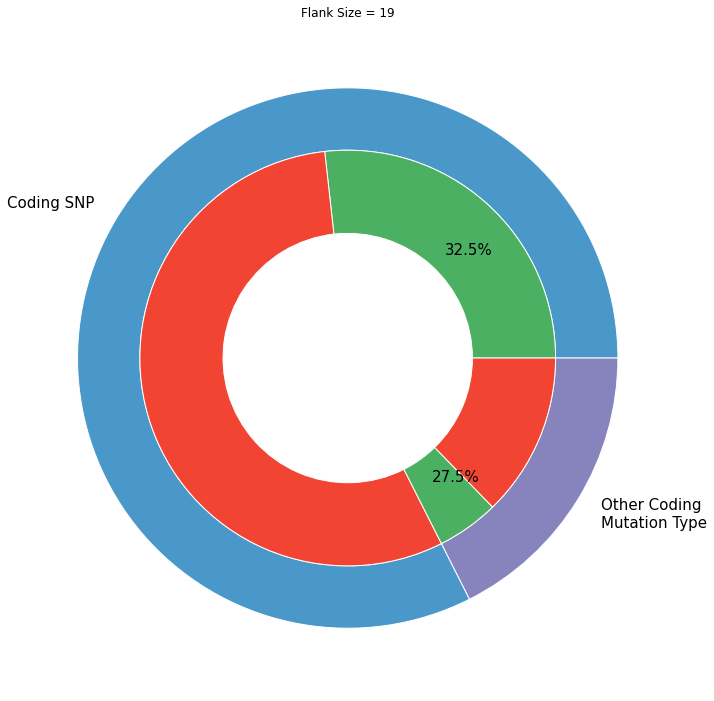

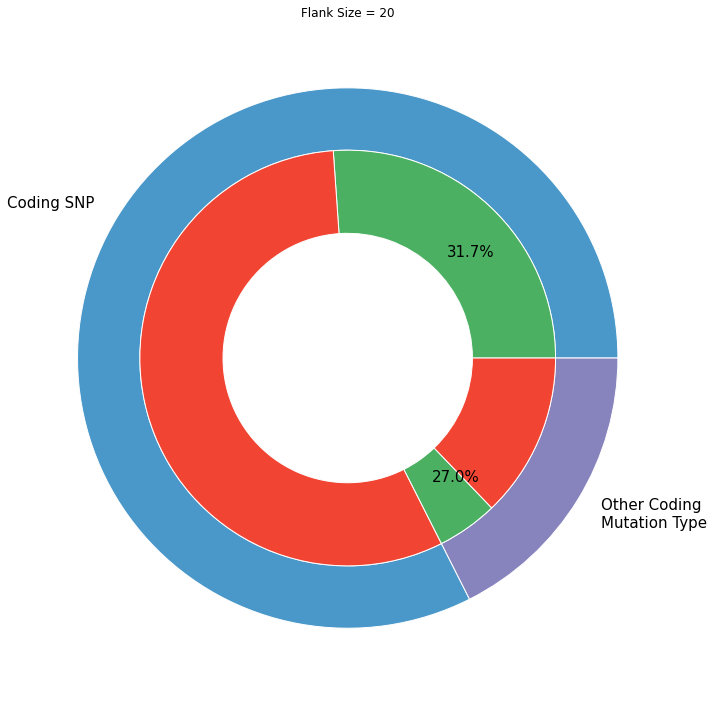

In [192]:
for flank_size in range(21):
    snps_homo = homologous1[flank_size][4]
    snps_nonhomo = non_homologous1[flank_size][4]
    non_snps_homo = sum(homologous1[flank_size]) - homologous1[flank_size][4]
    non_snps_nonhomo =  sum(non_homologous1[flank_size]) - non_homologous1[flank_size][4]

    snp_perc1 = np.round(100*(snps_homo/(snps_homo+snps_nonhomo)), 1)
    non_snp_perc1 = np.round(100*(non_snps_homo/(non_snps_homo+non_snps_nonhomo)), 1)

    # Make data: I have 3 groups and 7 subgroups
    group_names=['Coding SNP' , 'Other Coding\nMutation Type'] #
    snp_unrecorded = []
    group_size=[snps_homo + snps_nonhomo, non_snps_homo+non_snps_nonhomo] #excluding missing SNPs
    subgroup_names=[str(snp_perc1) + '%', '', str(non_snp_perc1) + '%', '']

    subgroup_size = [snps_homo, snps_nonhomo, non_snps_homo, non_snps_nonhomo]
    
    #subgroup_size=[4,3,5,6,5,10,5,5,4,6]

    # Create colors
    a, b, c, d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]

    # First Ring (outside)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.axis('equal')
    mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), d(0.6)], textprops={'fontsize': 15})
    plt.setp( mypie, width=0.3, edgecolor='white')

    # Second Ring (Inside)
    mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[c(0.6), b(0.6), c(0.6), b(0.6)], textprops={'fontsize': 15})
    plt.setp( mypie2, width=0.4, edgecolor='white')
    plt.margins(0,0)

    # show it
    plt.title('Flank Size = ' + str(flank_size))
    plt.tight_layout()
    fig.savefig('flank' + str(flank_size) + '_donut.png', dpi=250)

In [193]:
mut_types

array(['DEL', 'DNP', 'INS', 'ONP', 'SNP', 'TNP', 'UNK'], dtype=object)

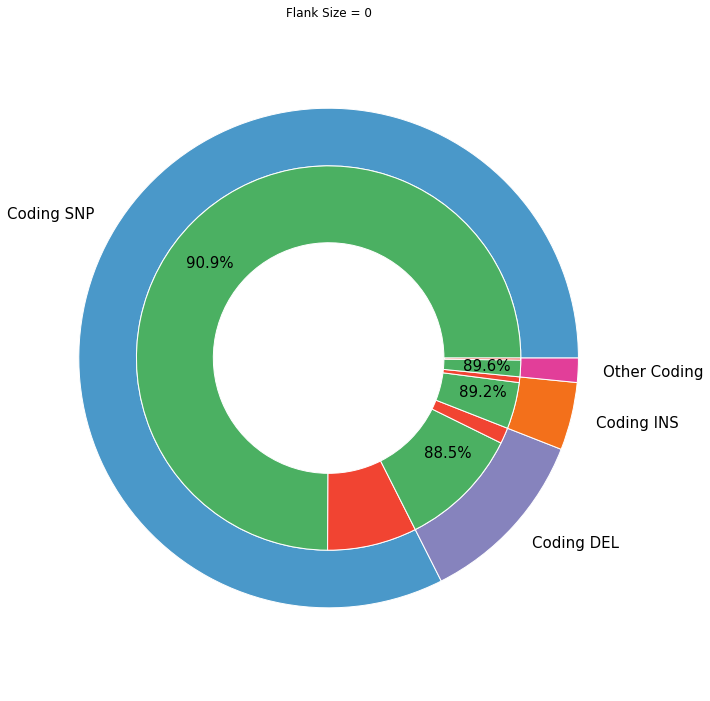

In [199]:
#can also break it down further
flank_size=0
snps_homo = homologous1[flank_size][4]
snps_nonhomo = non_homologous1[flank_size][4]
del_homo = homologous1[flank_size][0]
del_nonhomo = non_homologous1[flank_size][0]
ins_homo = homologous1[flank_size][2]
ins_nonhomo = non_homologous1[flank_size][2]
other_homo = sum(homologous1[flank_size]) - homologous1[flank_size][4] - homologous1[flank_size][0]- homologous1[flank_size][2]
other_nonhomo =  sum(non_homologous1[flank_size]) - non_homologous1[flank_size][4] - non_homologous1[flank_size][0]- non_homologous1[flank_size][2]

p1 = np.round(100*(snps_homo/(snps_homo+snps_nonhomo)), 1)
p2 = np.round(100*(del_homo/(del_homo+del_nonhomo)), 1)
p3 = np.round(100*(ins_homo/(ins_homo+ins_nonhomo)), 1)
p4 = np.round(100*(other_homo/(other_homo+other_nonhomo)), 1)

snp_perc1 = np.round(100*(snps_homo/(snps_homo+snps_nonhomo)), 1)
non_snp_perc1 = np.round(100*(non_snps_homo/(non_snps_homo+non_snps_nonhomo)), 1)

# Make data: I have 3 groups and 7 subgroups
group_names=['Coding SNP' , 'Coding DEL','Coding INS', 'Other Coding'] #
snp_unrecorded = []
group_size=[snps_homo + snps_nonhomo, del_homo +del_nonhomo,  ins_homo+ins_nonhomo, other_homo+other_nonhomo] #excluding missing SNPs

subgroup_names=[str(p1) + '%', '', str(p2) + '%', '',str(p3) + '%', '',str(p4) + '%', '']
subgroup_size = [snps_homo, snps_nonhomo, del_homo, del_nonhomo, ins_homo, ins_nonhomo, other_homo, other_nonhomo]
#subgroup_size=[4,3,5,6,5,10,5,5,4,6]
 
# Create colors
a, b, c, d, e, f=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples, plt.cm.Oranges, plt.cm.RdPu]
 
# First Ring (outside)
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), d(0.6), e(0.6), f(0.6)], textprops={'fontsize': 15})
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[c(0.6), b(0.6), c(0.6), b(0.6),c(0.6), b(0.6),c(0.6), b(0.6)], textprops={'fontsize': 15})
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.title('Flank Size = ' + str(flank_size))
plt.tight_layout()
plt.show()
#plt.savefig('flank' + str(flank_size) + '_donut.png', dpi=250)

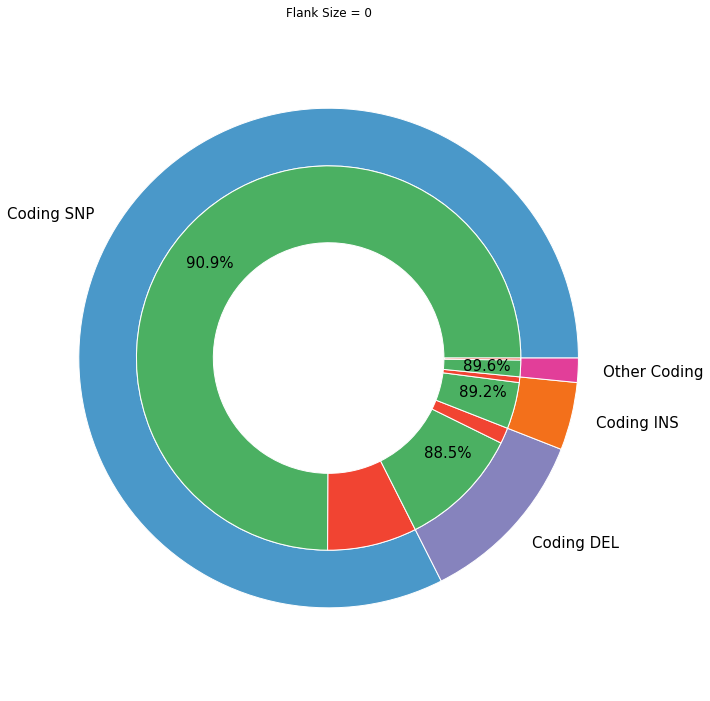

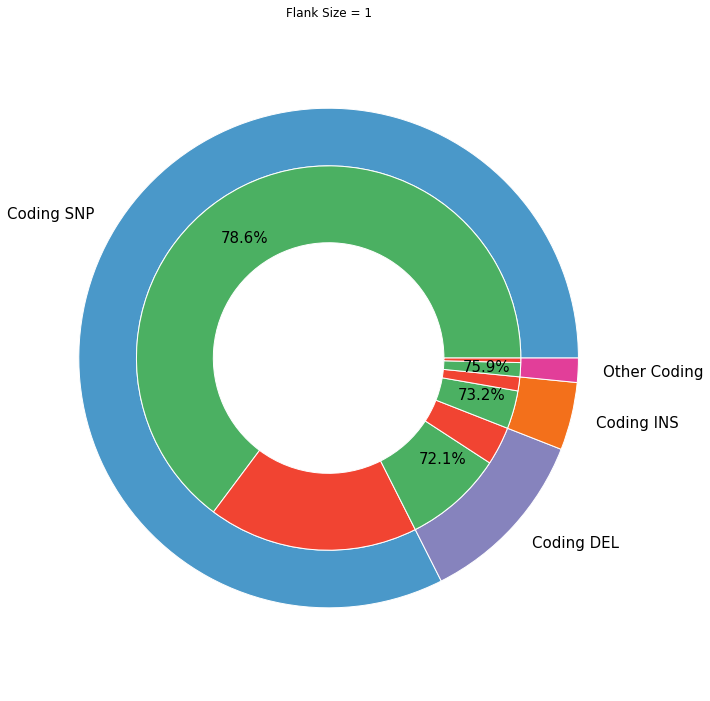

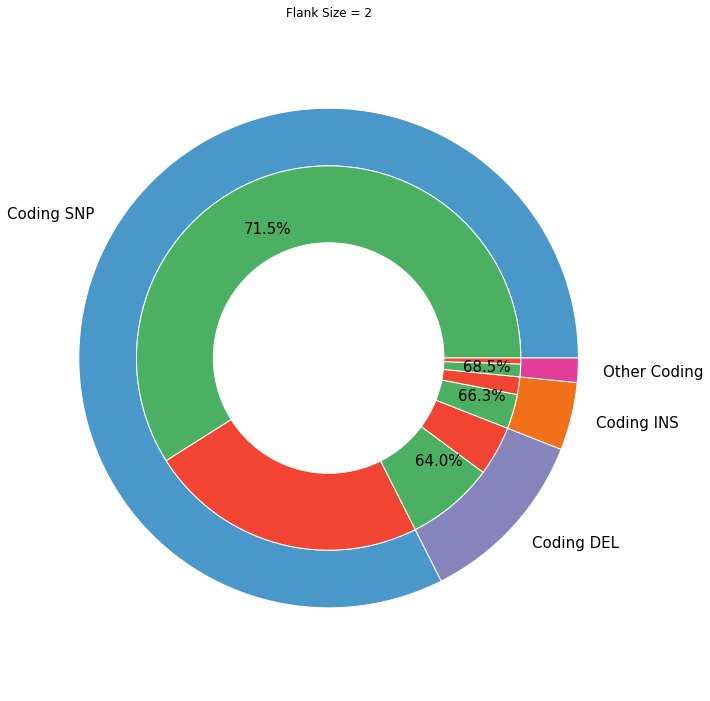

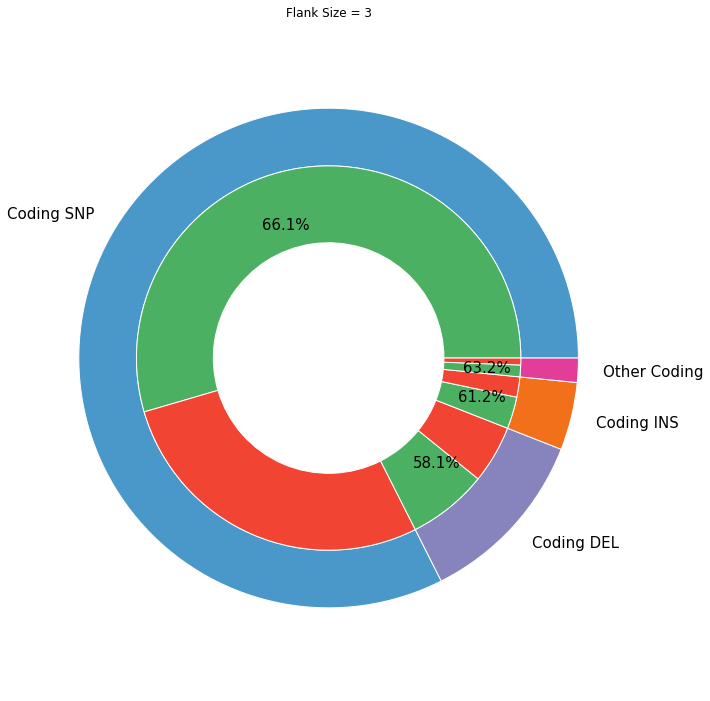

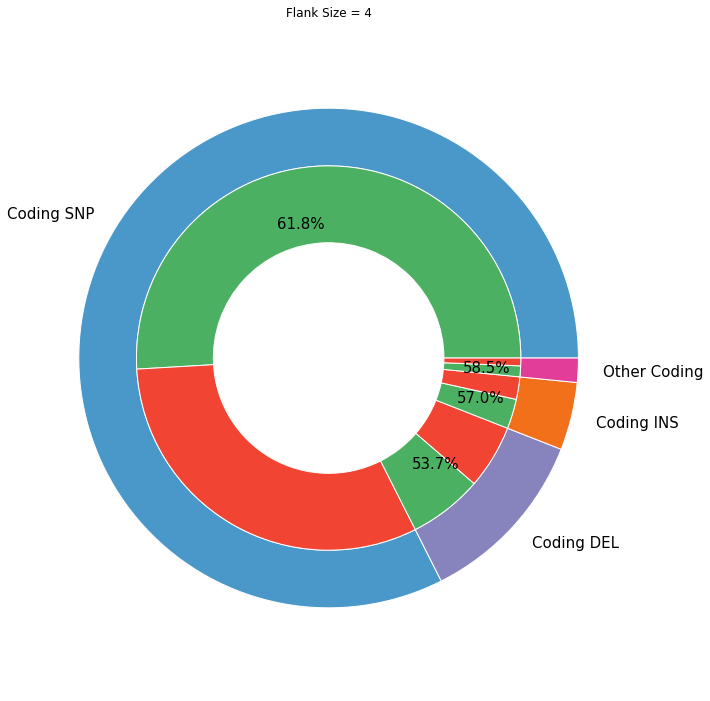

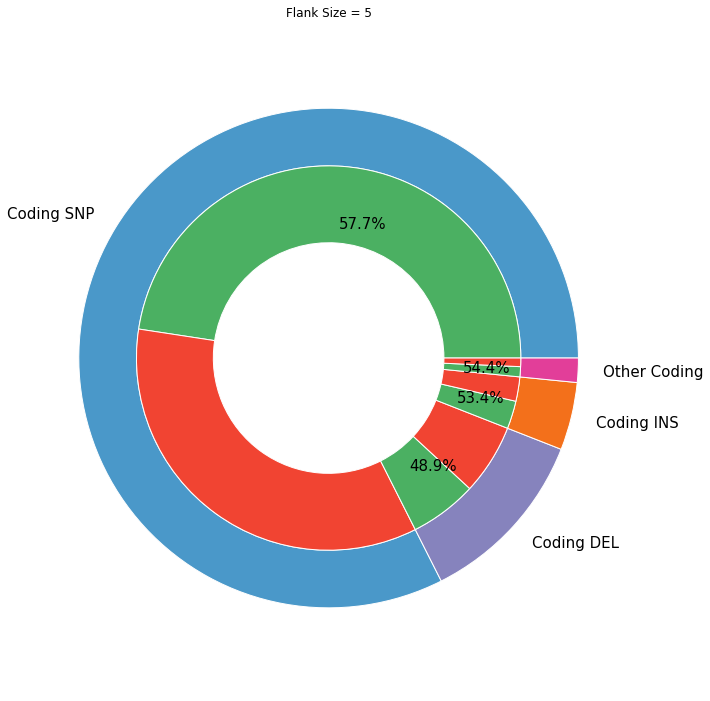

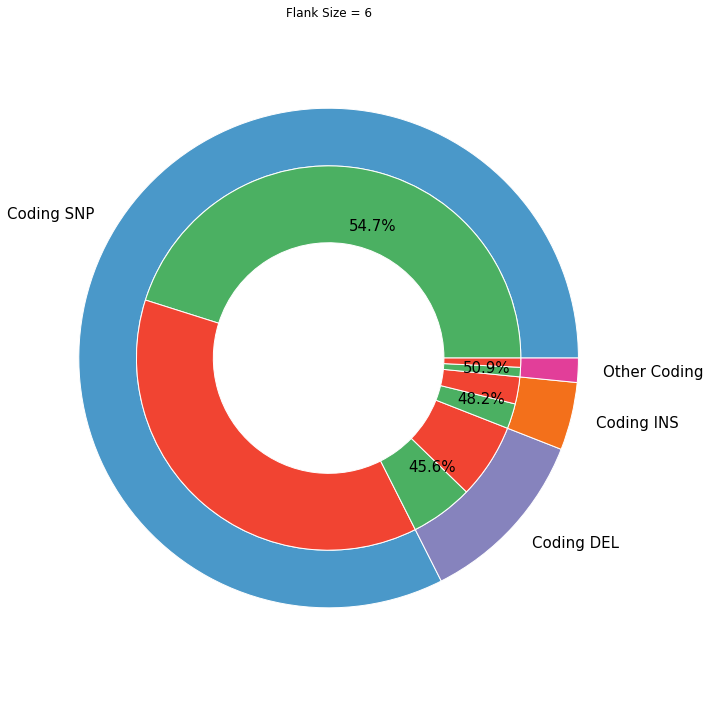

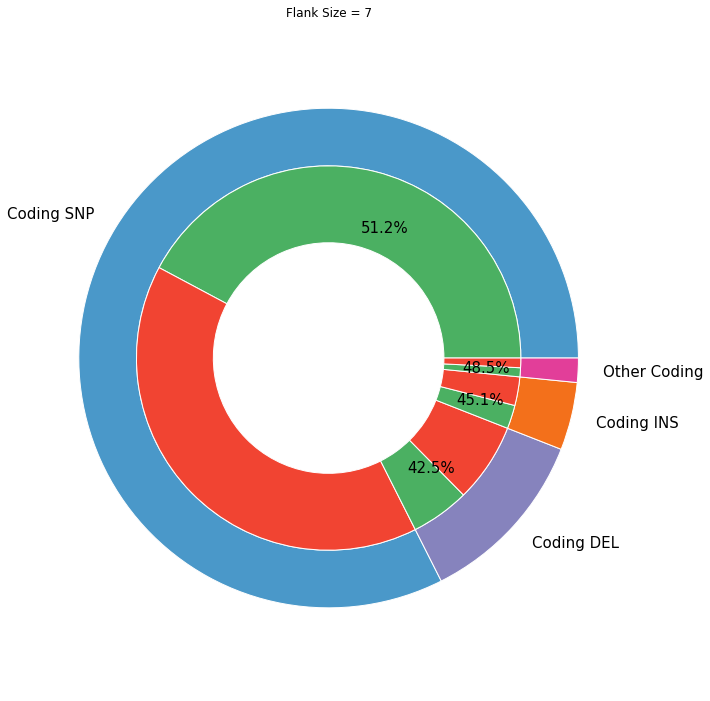

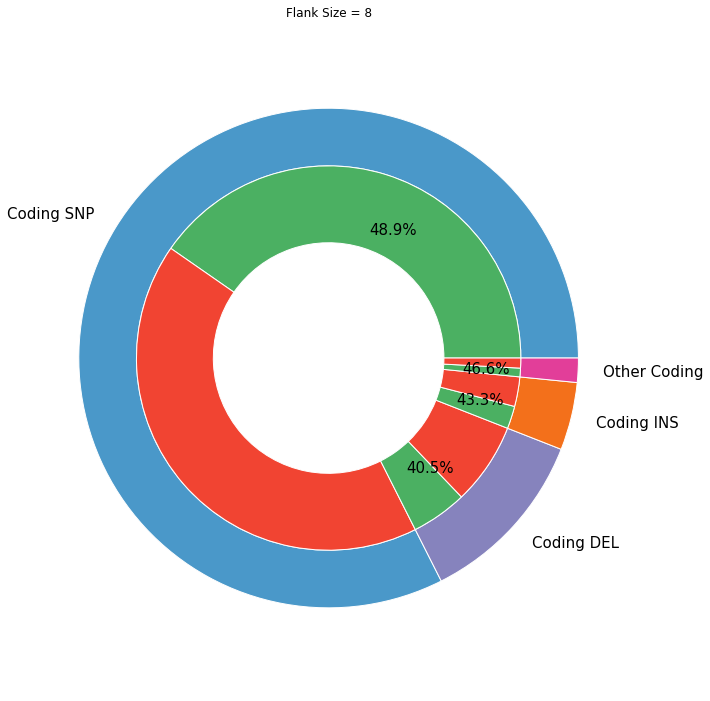

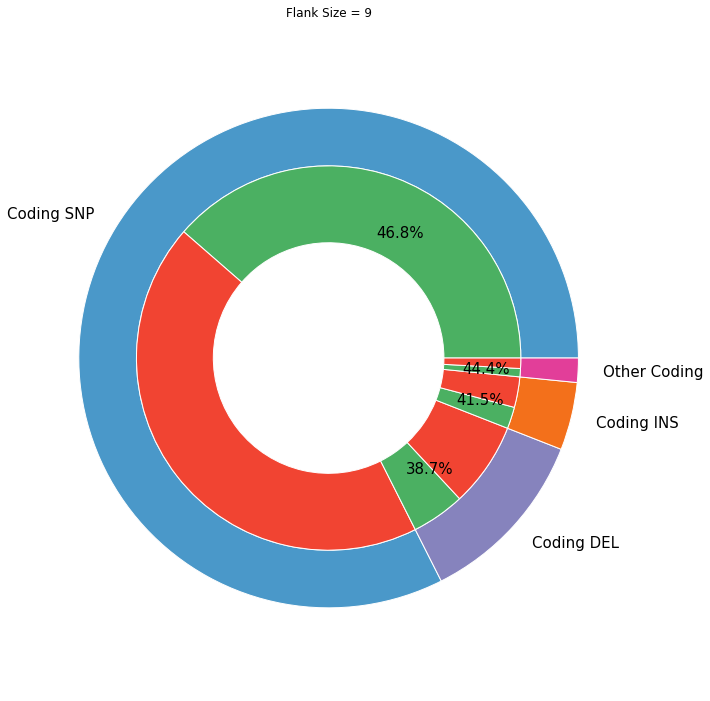

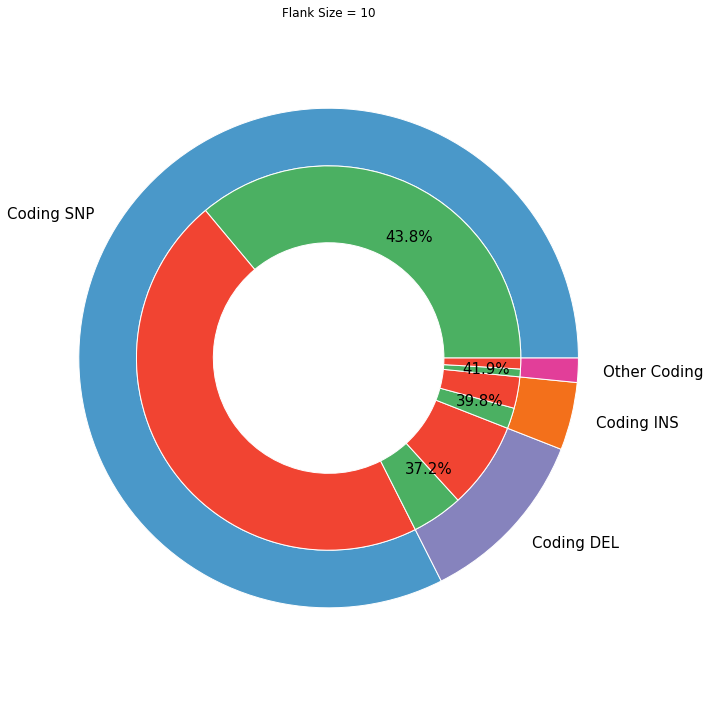

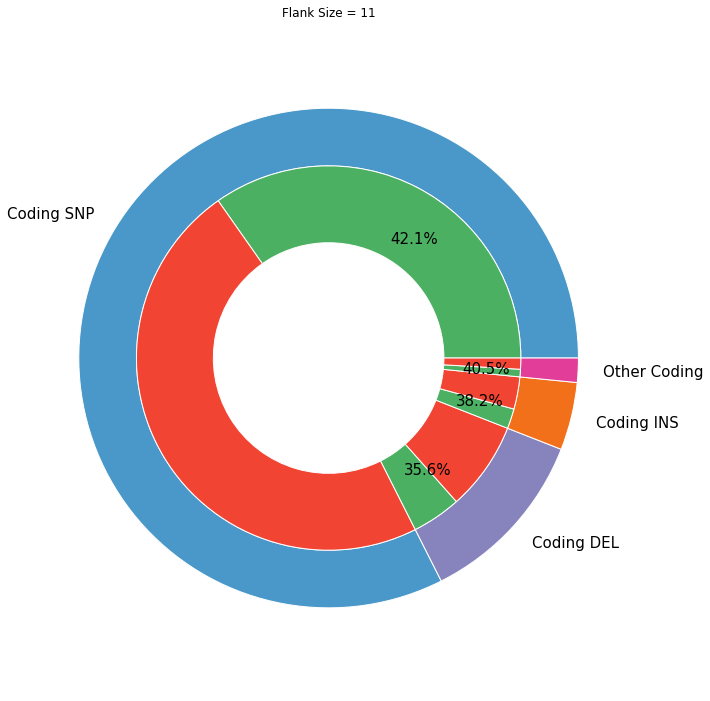

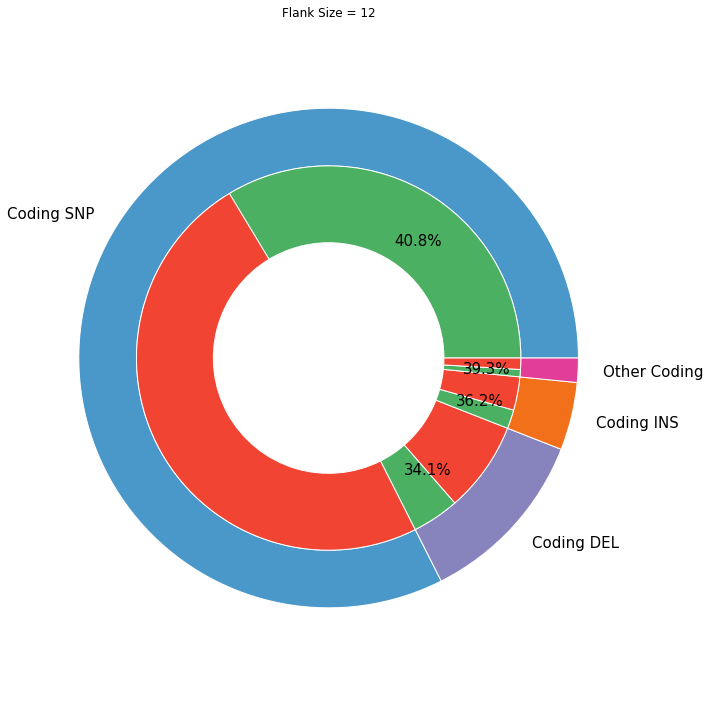

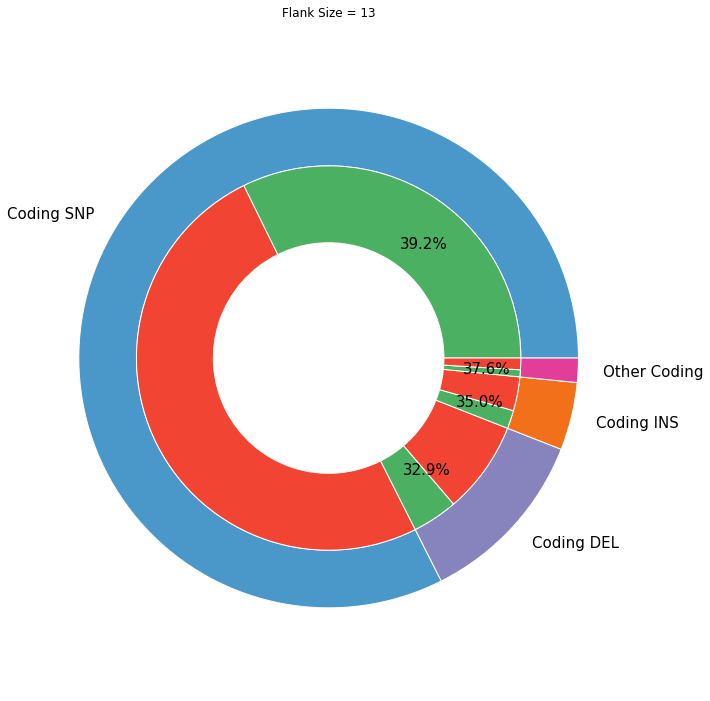

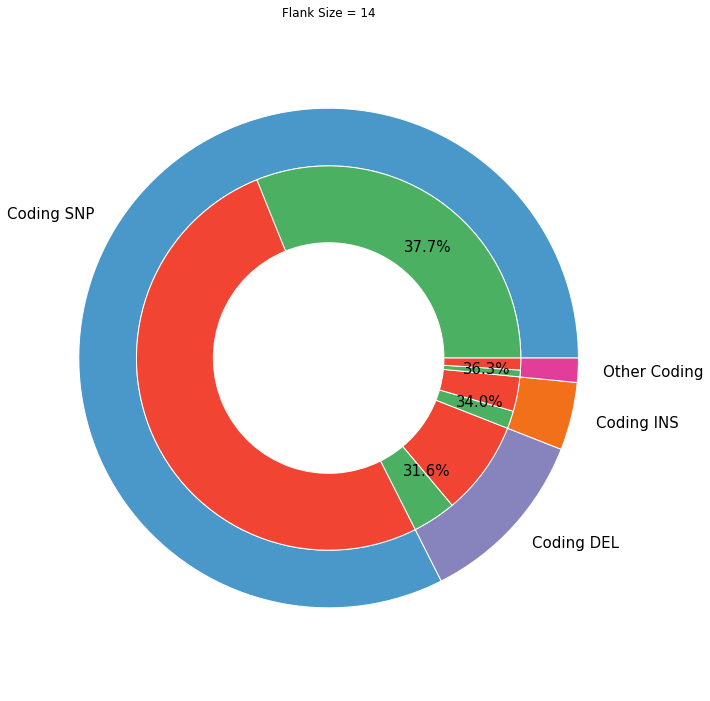

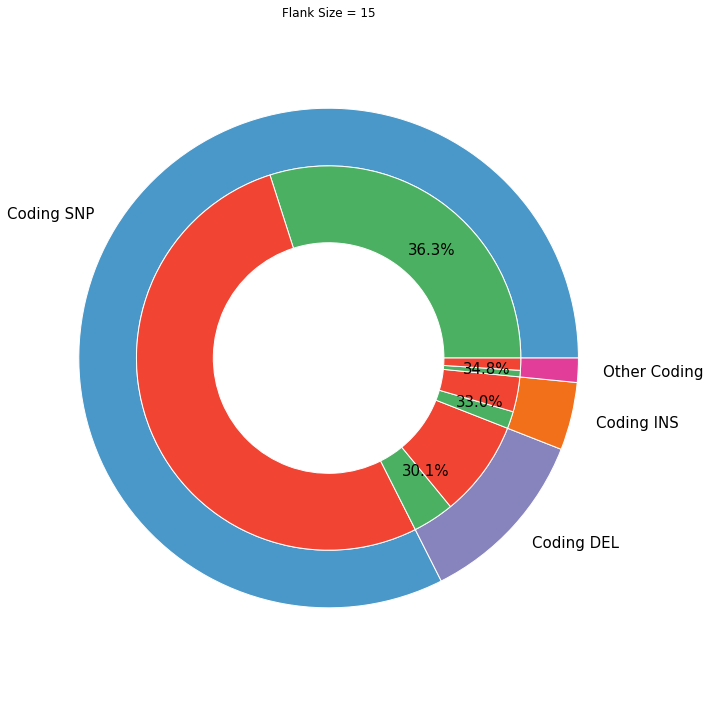

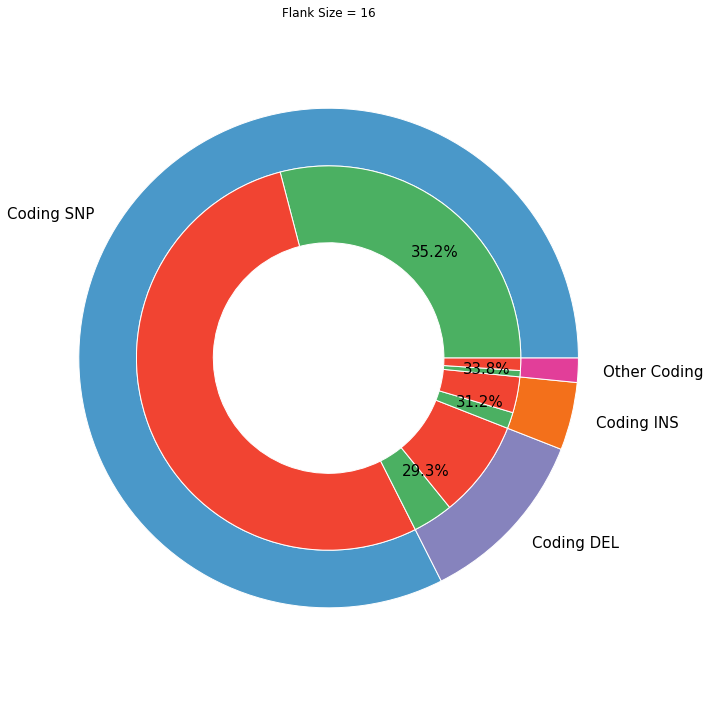

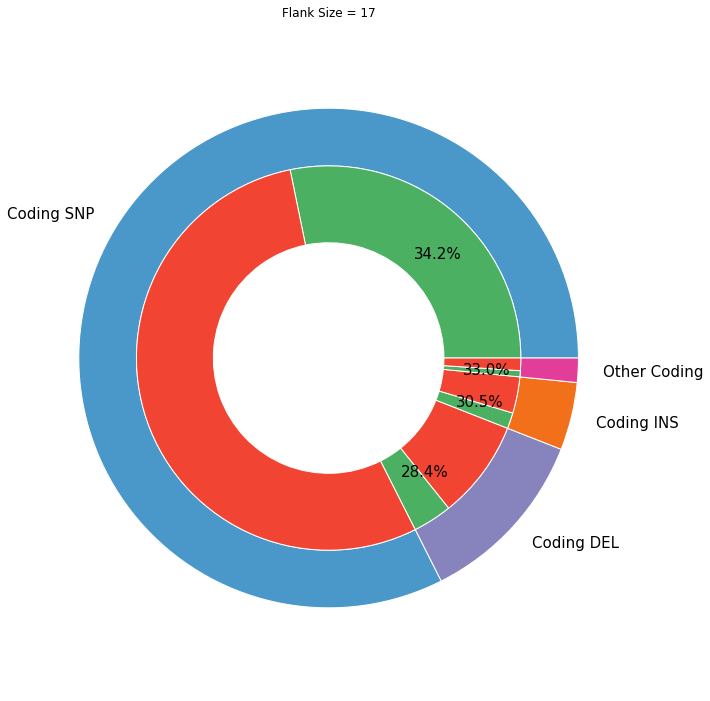

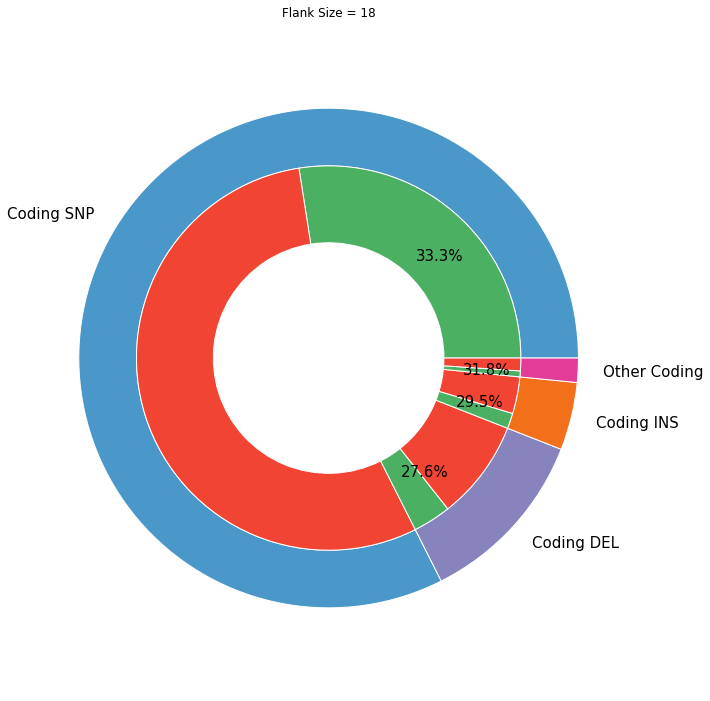

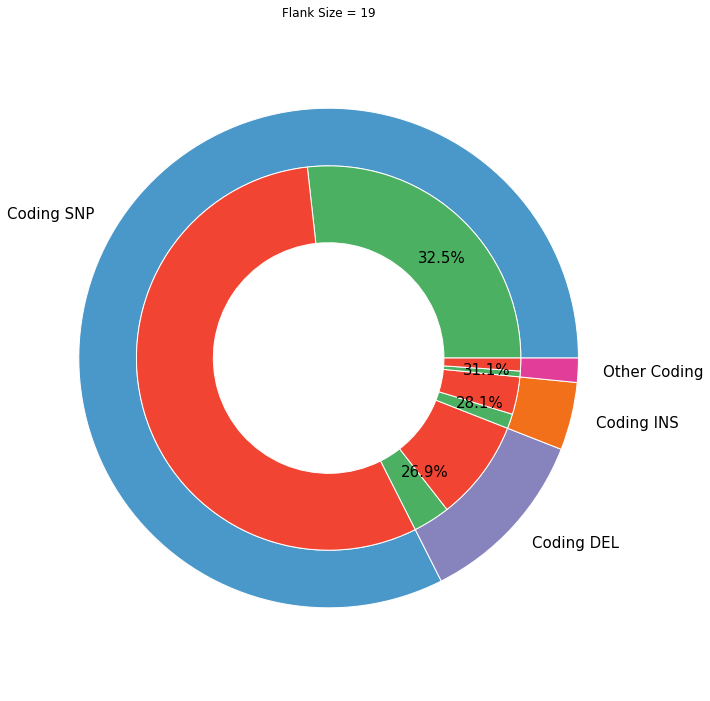

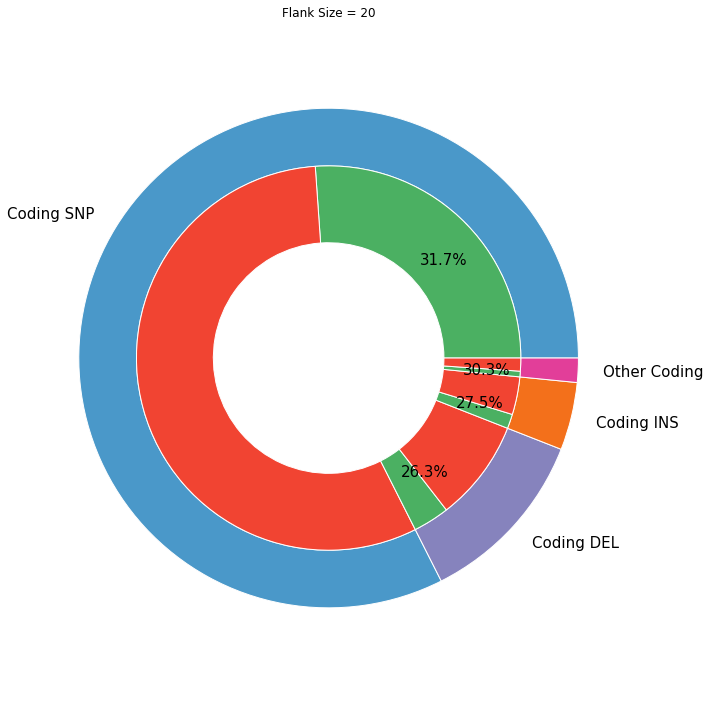

In [201]:
for flank_size in range(21):
    snps_homo = homologous1[flank_size][4]
    snps_nonhomo = non_homologous1[flank_size][4]
    del_homo = homologous1[flank_size][0]
    del_nonhomo = non_homologous1[flank_size][0]
    ins_homo = homologous1[flank_size][2]
    ins_nonhomo = non_homologous1[flank_size][2]
    other_homo = sum(homologous1[flank_size]) - homologous1[flank_size][4] - homologous1[flank_size][0]- homologous1[flank_size][2]
    other_nonhomo =  sum(non_homologous1[flank_size]) - non_homologous1[flank_size][4] - non_homologous1[flank_size][0]- non_homologous1[flank_size][2]

    p1 = np.round(100*(snps_homo/(snps_homo+snps_nonhomo)), 1)
    p2 = np.round(100*(del_homo/(del_homo+del_nonhomo)), 1)
    p3 = np.round(100*(ins_homo/(ins_homo+ins_nonhomo)), 1)
    p4 = np.round(100*(other_homo/(other_homo+other_nonhomo)), 1)

    snp_perc1 = np.round(100*(snps_homo/(snps_homo+snps_nonhomo)), 1)
    non_snp_perc1 = np.round(100*(non_snps_homo/(non_snps_homo+non_snps_nonhomo)), 1)

    # Make data: I have 3 groups and 7 subgroups
    group_names=['Coding SNP' , 'Coding DEL','Coding INS', 'Other Coding'] #
    snp_unrecorded = []
    group_size=[snps_homo + snps_nonhomo, del_homo +del_nonhomo,  ins_homo+ins_nonhomo, other_homo+other_nonhomo] #excluding missing SNPs

    subgroup_names=[str(p1) + '%', '', str(p2) + '%', '',str(p3) + '%', '',str(p4) + '%', '']
    subgroup_size = [snps_homo, snps_nonhomo, del_homo, del_nonhomo, ins_homo, ins_nonhomo, other_homo, other_nonhomo]
    #subgroup_size=[4,3,5,6,5,10,5,5,4,6]

    # Create colors
    a, b, c, d, e, f=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples, plt.cm.Oranges, plt.cm.RdPu]

    # First Ring (outside)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.axis('equal')
    mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), d(0.6), e(0.6), f(0.6)], textprops={'fontsize': 15})
    plt.setp( mypie, width=0.3, edgecolor='white')

    # Second Ring (Inside)
    mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[c(0.6), b(0.6), c(0.6), b(0.6),c(0.6), b(0.6),c(0.6), b(0.6)], textprops={'fontsize': 15})
    plt.setp( mypie2, width=0.4, edgecolor='white')
    plt.margins(0,0)

    # show it
    plt.title('Flank Size = ' + str(flank_size))
    plt.tight_layout()
    plt.show()
    fig.savefig('breakdown_flank' + str(flank_size) + '_donut.png', dpi=250)

## making triple layer donut plot, showing coding mutations and homology on same plot

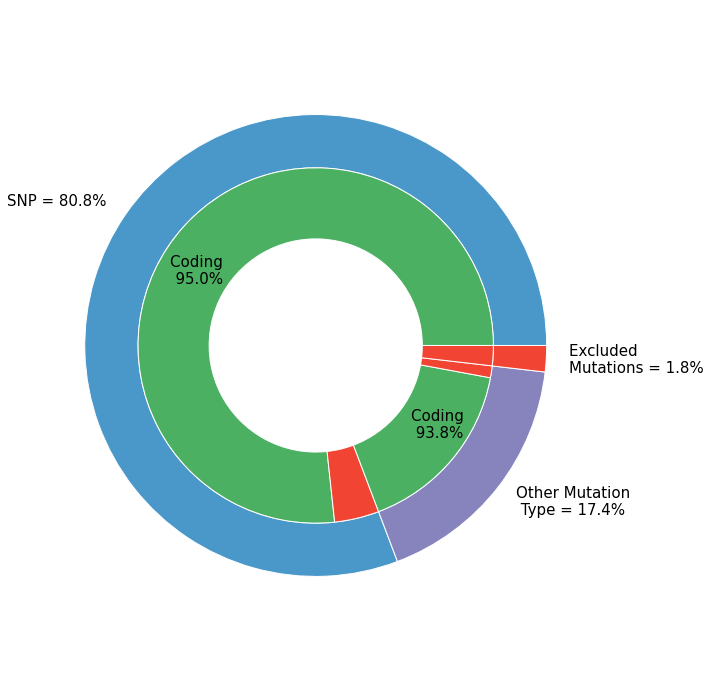

In [18]:
group_names=['SNP = ' + str(snps_perc) + '%', 'Other Mutation \n Type = ' + str(non_snps_perc) + '%', 'Excluded \nMutations = '+ str(excl_perc) + '%'] #
snp_unrecorded = []
group_size=[snps, non_snps, excl] #excluding missing SNPs
subgroup_names=['\n    Coding\n  ' + str(snpprct) + '%', '', 'Coding \n ' + str(nsnpprct) + '%', '', '']

subgroup_size = [snps_coding,snp_noncoding, non_snps_coding,non_snps_noncoding, excl]
#subgroup_size=[4,3,5,6,5,10,5,5,4,6]
 
# Create colors
a, b, c, d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]
 
# First Ring (outside)
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), d(0.6),b(0.6)], textprops={'fontsize': 15})
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[c(0.6), b(0.6), c(0.6), b(0.6), b(0.6)], textprops={'fontsize': 15})
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.tight_layout()
plt.show()

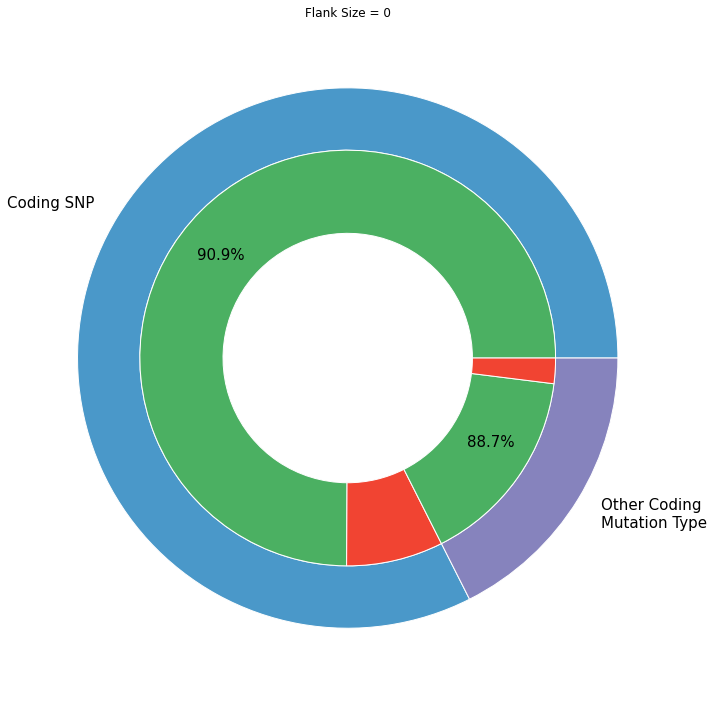

In [24]:
# Make data: I have 3 groups and 7 subgroups
group_names=['Coding SNP' , 'Other Coding\nMutation Type'] #
snp_unrecorded = []
group_size=[snps_homo + snps_nonhomo, non_snps_homo+non_snps_nonhomo] #excluding missing SNPs
subgroup_names=[str(snp_perc1) + '%', '', str(non_snp_perc1) + '%', '']

subgroup_size = [snps_homo, snps_nonhomo, non_snps_homo, non_snps_nonhomo]
#subgroup_size=[4,3,5,6,5,10,5,5,4,6]
 
# Create colors
a, b, c, d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]
 
# First Ring (outside)
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), d(0.6)], textprops={'fontsize': 15})
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[c(0.6), b(0.6), c(0.6), b(0.6)], textprops={'fontsize': 15})
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.title('Flank Size = ' + str(flank_size))
plt.tight_layout()
plt.show()
#plt.savefig('flank' + str(flank_size) + '_donut.png', dpi=250)

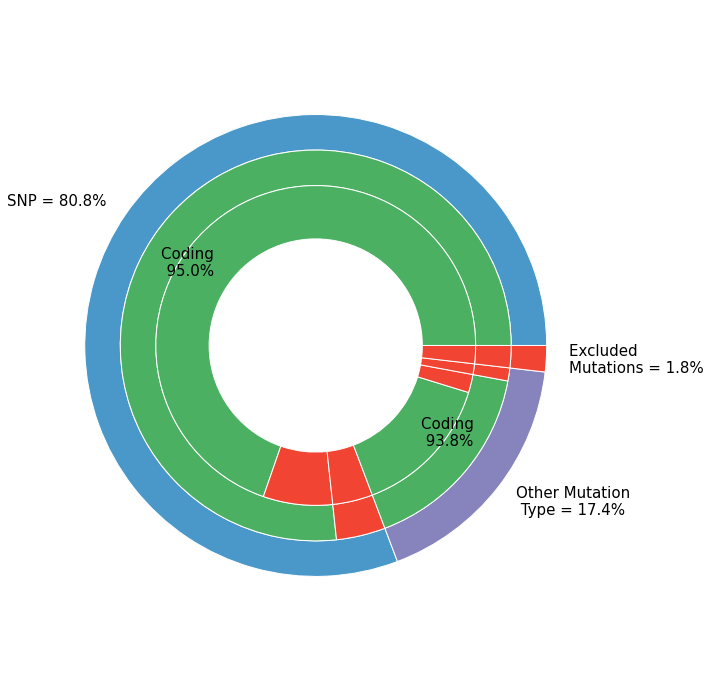

In [37]:
#here's the triple layer
group_names=['SNP = ' + str(snps_perc) + '%', 'Other Mutation \n Type = ' + str(non_snps_perc) + '%', 'Excluded \nMutations = '+ str(excl_perc) + '%'] #
snp_unrecorded = []
group_size=[snps, non_snps, excl] #excluding missing SNPs
subgroup_names=['\n    Coding\n  ' + str(snpprct) + '%', '', 'Coding \n ' + str(nsnpprct) + '%', '', '']

subgroup_size = [snps_coding,snp_noncoding, non_snps_coding,non_snps_noncoding, excl]
#subgroup_size=[4,3,5,6,5,10,5,5,4,6]
 
# Create colors
a, b, c, d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]
 
# First Ring (outside)
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), d(0.6),b(0.6)], textprops={'fontsize': 15})
plt.setp( mypie, width=0.2, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.2, labels=subgroup_names, labeldistance=0.7, colors=[c(0.6), b(0.6), c(0.6), b(0.6), b(0.6)], textprops={'fontsize': 15})
plt.setp( mypie2, width=0.2, edgecolor='white')
plt.margins(0,0)

#third ring (smalles)
#subgroup_size = [snps_coding,snp_noncoding, non_snps_coding,non_snps_noncoding, excl]
#subgroup_size = [snps_homo, snps_nonhomo, non_snps_homo, non_snps_nonhomo]
subgroup_size2 = [snps_homo, snps_nonhomo,snp_noncoding,  non_snps_homo, non_snps_nonhomo, non_snps_noncoding, excl]


mypie3, _ = ax.pie(subgroup_size2, radius=1.3-0.4, labels=None, labeldistance=0.7, colors=[c(0.6), b(0.6),b(0.6), c(0.6), b(0.6), b(0.6), b(0.6)], textprops={'fontsize': 15})
plt.setp( mypie3, width=0.3, edgecolor='white')
plt.margins(0,0)
#plt.legend()
 
# show it
plt.tight_layout()
plt.show()


In [68]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica Neue']})
#rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=False)

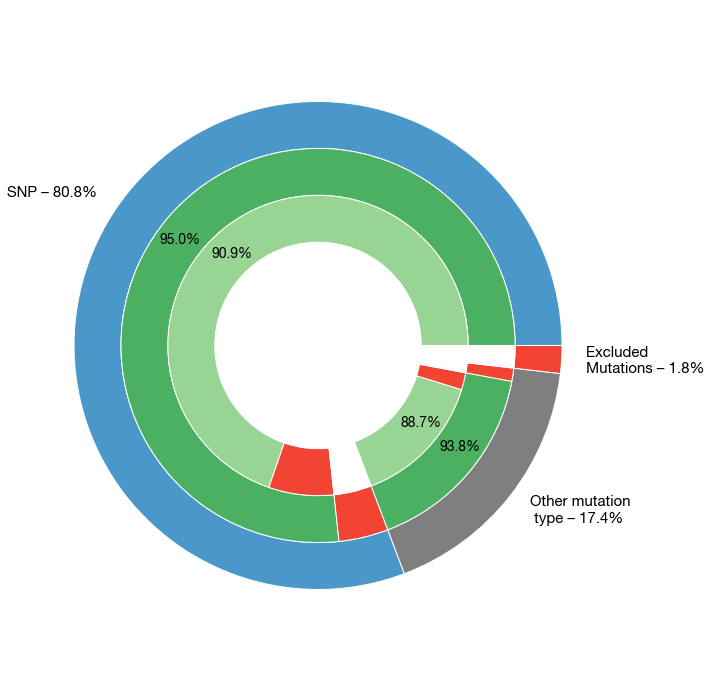

In [52]:
#alternate version
group_names=['SNP – ' + str(snps_perc) + '%', 'Other mutation \n type – ' + str(non_snps_perc) + '%', 'Excluded \nMutations – '+ str(excl_perc) + '%'] #
snp_unrecorded = []
group_size=[snps, non_snps, excl] #excluding missing SNPs
subgroup_names=[str(snpprct) + '%', '', str(nsnpprct) + '%', '', '']

subgroup_size = [snps_coding,snp_noncoding, non_snps_coding,non_snps_noncoding, excl]
#subgroup_size=[4,3,5,6,5,10,5,5,4,6]
 
# Create colors
a, b, c, d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]
 
# First Ring (outside)
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), 'tab:gray',b(0.6)], textprops={'fontsize': 15})
plt.setp( mypie, width=0.25, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.25, labels=subgroup_names, labeldistance=0.80, colors=[c(0.6), b(0.6), c(0.6), b(0.6), 'white'], textprops={'fontsize': 14})
plt.setp( mypie2, width=0.25, edgecolor='white')
plt.margins(0,0)

#third ring (smalles)
#subgroup_size = [snps_coding,snp_noncoding, non_snps_coding,non_snps_noncoding, excl]
#subgroup_size = [snps_homo, snps_nonhomo, non_snps_homo, non_snps_nonhomo]
subgroup_names2=[str(snp_perc1) + '%', '','', str(non_snp_perc1) + '%', '','', '']
subgroup_size2 = [snps_homo, snps_nonhomo, snp_noncoding,  non_snps_homo, non_snps_nonhomo, non_snps_noncoding, excl]


mypie3, _ = ax.pie(subgroup_size2, radius=1.3-0.5, labels=subgroup_names2, labeldistance=0.75, colors=[c(0.4), b(0.6),'white', c(0.4), b(0.6), 'white', 'white'], textprops={'fontsize': 14})
plt.setp( mypie3, width=0.25, edgecolor='white')
plt.margins(0,0)
#plt.legend()
 
# show it
plt.tight_layout()

plt.show()

#fig.savefig('triple_donut_colored2.png', dpi=250)

# Looking at homology in BE accessible mutations

In [53]:
#saving these arrays for later use
filepath = '/Volumes/Sam_G_SSD/BE coverage quant CORRECTED/'
CBEproto = np.load(filepath + 'CBE_proto.npy')
CBEideal = np.load(filepath + 'CBE_ideal.npy')
ABEproto = np.load(filepath + 'ABE_proto.npy')
ABEideal = np.load(filepath + 'ABE_ideal.npy')

In [57]:
path = '/Volumes/Sam_G_SSD/'
i=0
df = pd.read_csv(path+'flanksize_' + str(i) +'.csv')
df

,Unnamed: 0,homologous,non_homologous,coding_mutations,non_coding_mutations,excluded_mutations,aa_concordant,dna_concordant,original_aa,new_aa_h,new_aa_m,variant_type
0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,none,none,none,SNP
1,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,S,none,none,DEL
2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,M,T,T,SNP
3,3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,none,none,none,INS
4,4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,Q,none,none,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...
422817,422817,1.0,0.0,1.0,0.0,0.0,0.0,0.0,S,C,S,SNP
422818,422818,1.0,0.0,1.0,0.0,0.0,0.0,0.0,P,A,G,SNP
422819,422819,1.0,0.0,1.0,0.0,0.0,1.0,1.0,P,L,L,SNP
422820,422820,0.0,0.0,0.0,1.0,0.0,0.0,0.0,none,none,none,SNP


In [61]:
df.iloc[[0]]['variant_type'].values[0]

'SNP'

In [65]:
cod = np.asarray(df['coding_mutations'])
exc = np.asarray(df['excluded_mutations'])
hom = np.asarray(df['homologous'])

In [64]:
CBEproto

422822

In [66]:
non_snp=0

CBE_high_homo = 0
CBE_low_homo = 0
ABE_high_homo = 0
ABE_low_homo = 0

for i in range(422822):
    if df.iloc[[0]]['variant_type'].values[0]=='SNP':
        if (cod[i]+hom[i])==2: #check if coding and homologous
            if CBEproto[i]==1:
                CBE_low_homo +=1
            if CBEideal[i]==1:
                CBE_high_homo+=1
            if ABEproto[i]==1:
                ABE_low_homo+=1
            if ABEideal[i]==1:
                ABE_high_homo+=1
            
        else:
            continue
        
    else:
        non_snp+=1
        
    


In [69]:
CBE_low_homo_true = CBE_low_homo-CBE_high_homo
ABE_low_homo_true = ABE_low_homo-ABE_high_homo



In [79]:
inaccess = snps_coding-(CBE_high_homo+CBE_low_homo_true+ABE_high_homo+ABE_low_homo_true)

142041

In [72]:
sum(CBEideal)

143001.0

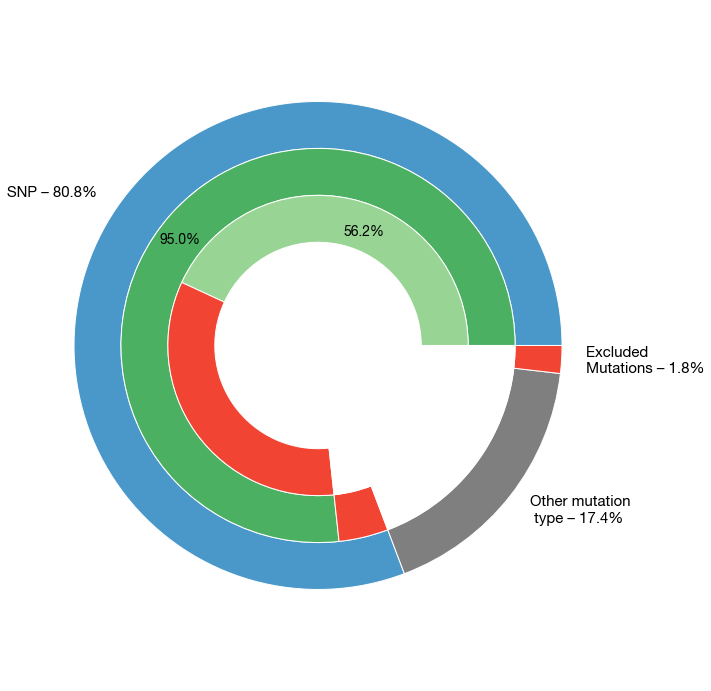

In [86]:
#alternate version
group_names=['SNP – ' + str(snps_perc) + '%', 'Other mutation \n type – ' + str(non_snps_perc) + '%', 'Excluded \nMutations – '+ str(excl_perc) + '%'] #
snp_unrecorded = []
group_size=[snps, non_snps, excl] #excluding missing SNPs
subgroup_names=[str(snpprct) + '%', '', '', '', '']

subgroup_size = [snps_coding,snp_noncoding, non_snps_coding,non_snps_noncoding, excl]
#subgroup_size=[4,3,5,6,5,10,5,5,4,6]
 
# Create colors
a, b, c, d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]
 
# First Ring (outside)
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), 'tab:gray',b(0.6)], textprops={'fontsize': 15})
plt.setp( mypie, width=0.25, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.25, labels=subgroup_names, labeldistance=0.80, colors=[c(0.6), b(0.6), 'white', 'white', 'white'], textprops={'fontsize': 14})
plt.setp( mypie2, width=0.25, edgecolor='white')
plt.margins(0,0)

#third ring (smalles)
#subgroup_size = [snps_coding,snp_noncoding, non_snps_coding,non_snps_noncoding, excl]
#subgroup_size = [snps_homo, snps_nonhomo, non_snps_homo, non_snps_nonhomo]
perc1 = np.round(100*access/(inaccess+access), 1)
subgroup_names2=[str(perc1) + '%', '','', '', '','', '']
inaccess = snps_coding-(CBE_high_homo+CBE_low_homo_true+ABE_high_homo+ABE_low_homo_true)
access = (CBE_high_homo+CBE_low_homo_true+ABE_high_homo+ABE_low_homo_true)
subgroup_size2 = [access, inaccess, snp_noncoding,  non_snps_homo, non_snps_nonhomo, non_snps_noncoding, excl]


mypie3, _ = ax.pie(subgroup_size2, radius=1.3-0.5, labels=subgroup_names2, labeldistance=0.775, colors=[c(0.4), b(0.6),'white', 'white', 'white', 'white', 'white'], textprops={'fontsize': 14})
plt.setp( mypie3, width=0.25, edgecolor='white')
plt.margins(0,0)
#plt.legend()
 
# show it
plt.tight_layout()
fig.savefig('BE_homo1.png', dpi=250)
plt.show()

## PE-BE COMPARISON bar plot

In [99]:
total_muts = 422822

human_BE_total  = 100*(sum(CBEproto)+sum(ABEproto))/total_muts
mouse_BE_total = 100*(access/total_muts)
human_PE_total = 99.9
mouse_PE_total = 100*(non_snps_homo + snps_homo)/total_muts

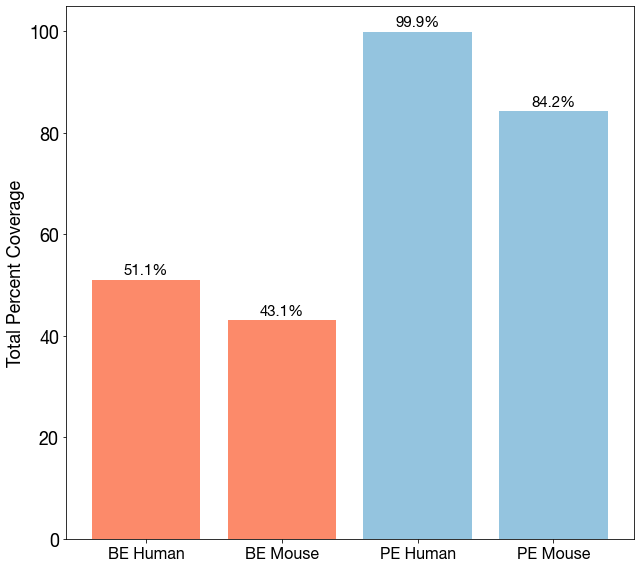

In [118]:
plt.figure(figsize=(9,8))
a, b=[plt.cm.Reds, plt.cm.Blues]
c_list = [a(0.4), a(0.4), b(0.4), b(0.4)]

plt.bar(['BE Human', 'BE Mouse', 'PE Human', 'PE Mouse'], [human_BE_total, mouse_BE_total, human_PE_total, mouse_PE_total], color=c_list)

plt.xticks(fontsize=16);
plt.yticks(fontsize=18);
plt.ylabel('Total Percent Coverage', fontsize=18);

list1 = [human_BE_total, mouse_BE_total, human_PE_total, mouse_PE_total]

for i in range(4):
    plt.text(i, list1[i]+1, str(np.round(list1[i], 1)) + '%', ha = 'center', fontsize=15)
 
plt.tight_layout()

plt.savefig('BE_PE_comp.png', dpi=250)